In [2]:
import pandas as pd
import numpy as np
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

In [3]:
# read data
train_path = 'dataset/train_X.csv'
label_path = 'dataset/train_Y.csv'
test_path = 'dataset/test_X.csv'
train_X = pd.read_csv(train_path)
train_Y = pd.read_csv(label_path)

In [4]:
# drop useless columns
train_X.drop(['encounter_id', 'patient_id'], axis=1, inplace=True)

In [5]:
# first analysis the dataset
print(train_X.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44939 entries, 0 to 44938
Data columns (total 81 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   hospital_id                    44939 non-null  int64  
 1   age                            42874 non-null  float64
 2   bmi                            43288 non-null  float64
 3   elective_surgery               44939 non-null  int64  
 4   ethnicity                      44239 non-null  object 
 5   gender                         44926 non-null  object 
 6   height                         44308 non-null  float64
 7   icu_admit_source               44888 non-null  object 
 8   icu_id                         44939 non-null  int64  
 9   icu_stay_type                  44939 non-null  object 
 10  icu_type                       44939 non-null  object 
 11  pre_icu_los_days               44939 non-null  float64
 12  weight                         43632 non-null 

In [6]:
print(train_X.describe())

        hospital_id           age           bmi  elective_surgery  \
count  44939.000000  42874.000000  43288.000000      44939.000000   
mean     105.732460     62.318701     29.195878          0.182314   
std       62.901289     16.804263      8.263748          0.386107   
min        2.000000     16.000000     14.844926          0.000000   
25%       47.000000     52.000000     23.638493          0.000000   
50%      109.000000     65.000000     27.680158          0.000000   
75%      161.000000     75.000000     32.962064          0.000000   
max      204.000000     89.000000     67.814990          1.000000   

             height        icu_id  pre_icu_los_days        weight  \
count  44308.000000  44939.000000      44939.000000  43632.000000   
mean     169.565517    509.502659          0.836469     84.002241   
std       10.788113    228.631369          2.565688     25.016278   
min      137.200000     82.000000        -13.775000     38.600000   
25%      162.500000    369.000000

In [7]:
# find the missing value
print(train_X.isnull().sum())

hospital_id                       0
age                            2065
bmi                            1651
elective_surgery                  0
ethnicity                       700
                               ... 
leukemia                        346
lymphoma                        346
solid_tumor_with_metastasis     346
apache_3j_bodysystem            807
apache_2_bodysystem             807
Length: 81, dtype: int64


In [8]:
# unique value of each categorical feature
categorical_feature = ['ethnicity', 'gender', 'icu_admit_source', 'icu_stay_type', 'icu_type', 'apache_3j_bodysystem', 'apache_2_bodysystem']
for feature in categorical_feature:
    print("unique value of feature {} (length = {}):".format(feature, len(train_X[feature].unique())))
    print(feature, train_X[feature].unique())

unique value of feature ethnicity (length = 7):
ethnicity ['Asian' 'Caucasian' 'African American' 'Hispanic' 'Other/Unknown' nan
 'Native American']
unique value of feature gender (length = 3):
gender ['M' 'F' nan]
unique value of feature icu_admit_source (length = 6):
icu_admit_source ['Accident & Emergency' 'Operating Room / Recovery' 'Floor' 'Other ICU'
 'Other Hospital' nan]
unique value of feature icu_stay_type (length = 3):
icu_stay_type ['admit' 'transfer' 'readmit']
unique value of feature icu_type (length = 8):
icu_type ['Neuro ICU' 'CTICU' 'Med-Surg ICU' 'SICU' 'MICU' 'CSICU' 'CCU-CTICU'
 'Cardiac ICU']
unique value of feature apache_3j_bodysystem (length = 12):
apache_3j_bodysystem ['Trauma' 'Cardiovascular' 'Neurological' 'Gastrointestinal' 'Respiratory'
 'Genitourinary' 'Metabolic' 'Sepsis' 'Musculoskeletal/Skin' nan
 'Hematological' 'Gynecological']
unique value of feature apache_2_bodysystem (length = 11):
apache_2_bodysystem ['Trauma' 'Undefined diagnoses' 'Neurologic' 

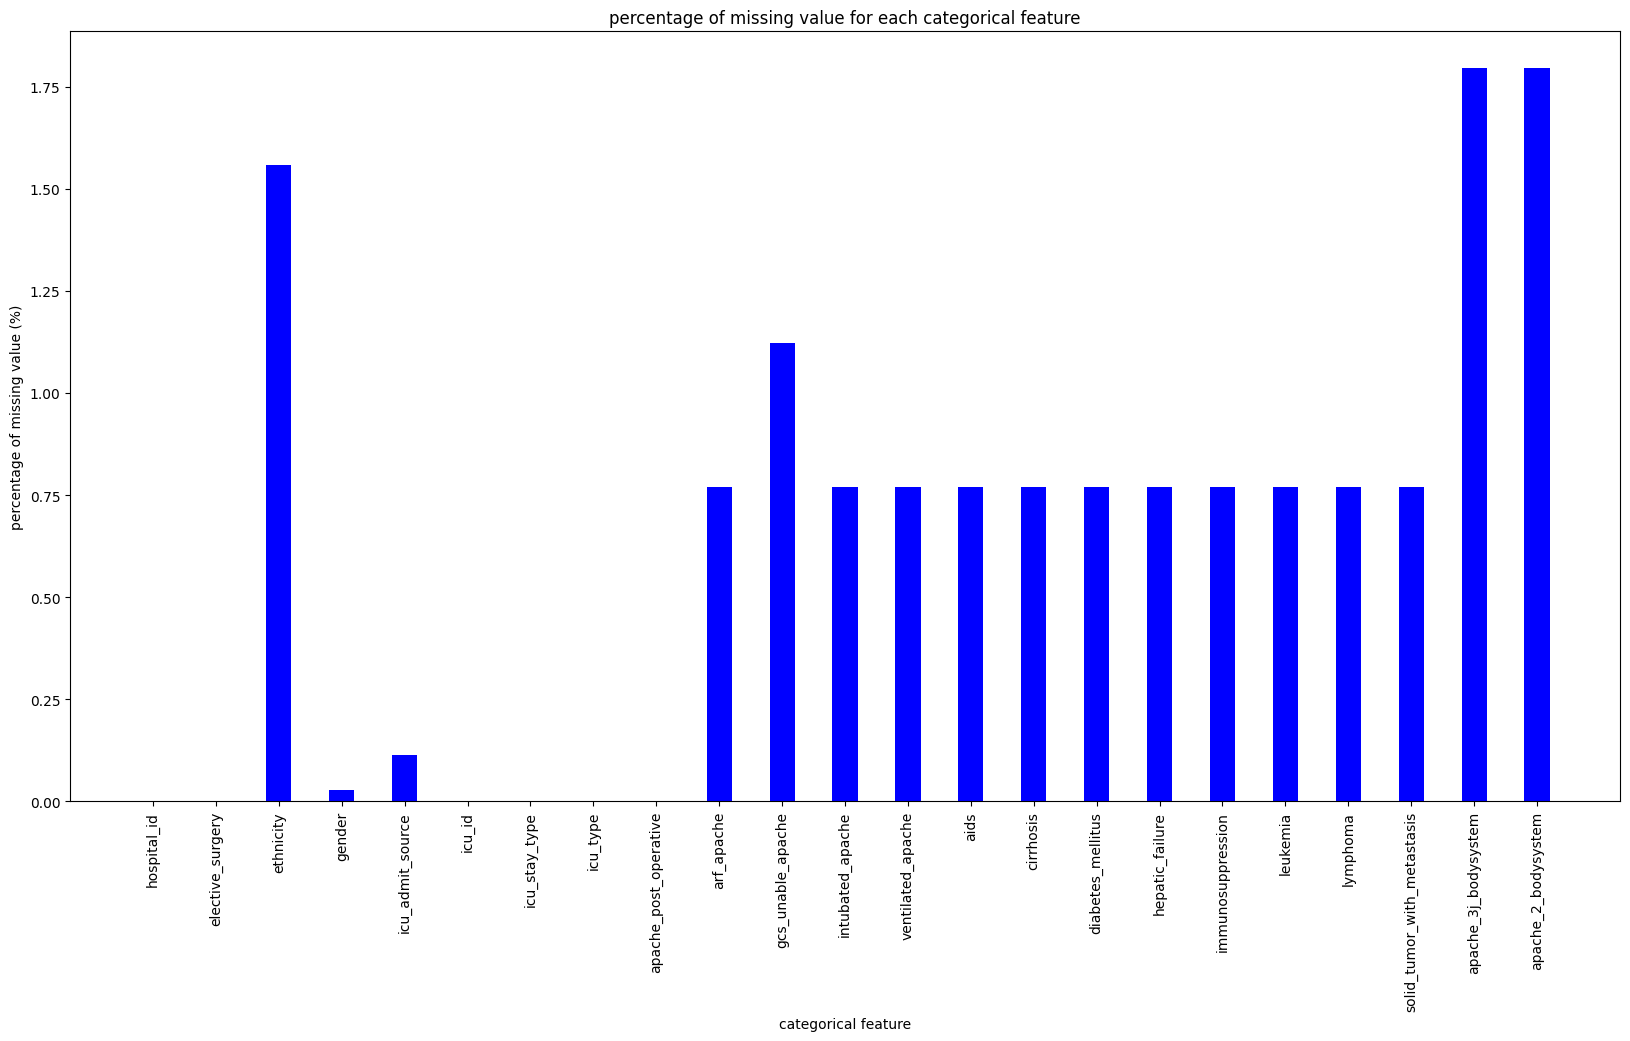

In [30]:
# plot of percentage of missing value for each categorical feature in one fig
categorical_feature = ['hospital_id', 'elective_surgery', 'ethnicity', 'gender', 'icu_admit_source', 'icu_id', 'icu_stay_type', 'icu_type', 'apache_post_operative',
                       'arf_apache', 'gcs_unable_apache', 'intubated_apache', 'ventilated_apache', 'aids', 'cirrhosis', 'diabetes_mellitus', 'hepatic_failure',
                       'immunosuppression', 'leukemia', 'lymphoma', 'solid_tumor_with_metastasis', 'apache_3j_bodysystem', 'apache_2_bodysystem']
missing_percentage = []
for feature in categorical_feature:
    missing_percentage.append(train_X[feature].isnull().sum() / len(train_X[feature]))
missing_percentage = np.array(missing_percentage) * 100
plt.figure(figsize=(20, 10))
plt.bar(categorical_feature, missing_percentage, color = 'blue', width = 0.4)
plt.xticks(rotation=90)
plt.xlabel('categorical feature')
plt.ylabel('percentage of missing value (%)')
plt.title('percentage of missing value for each categorical feature')
plt.show()

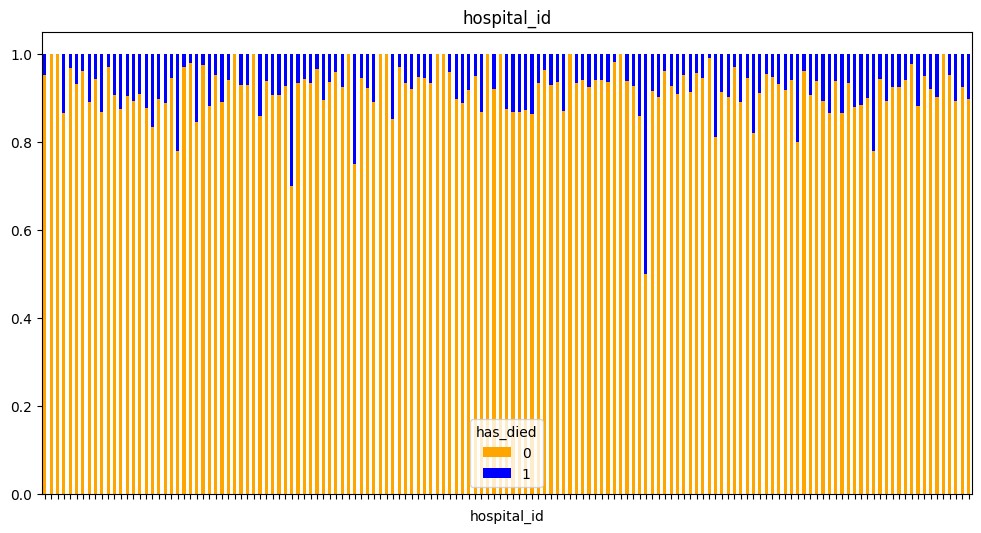

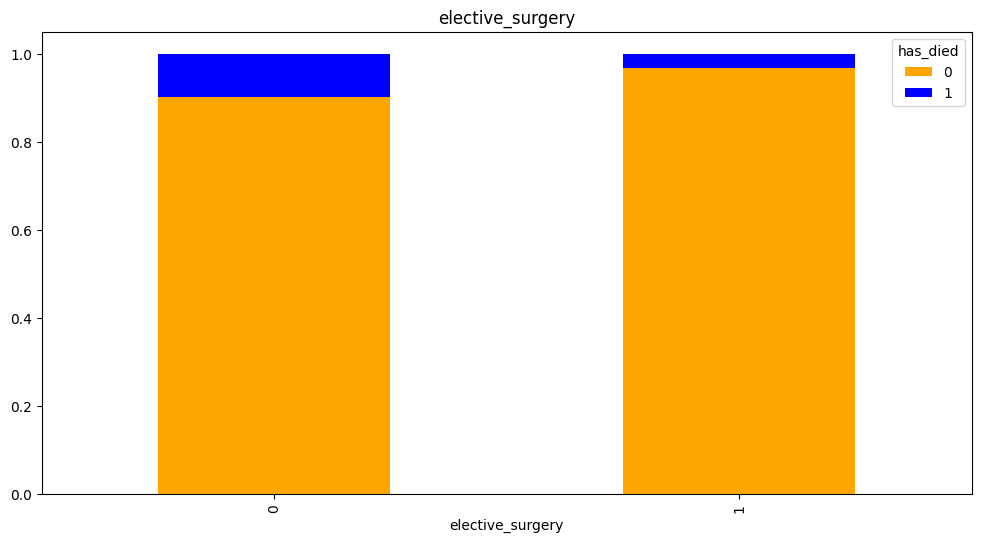

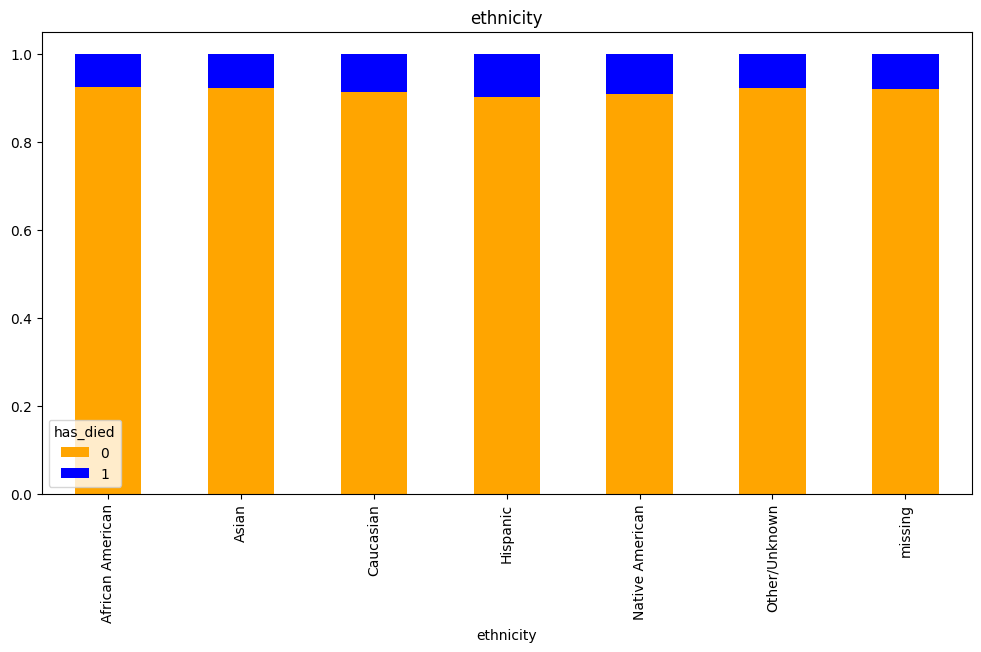

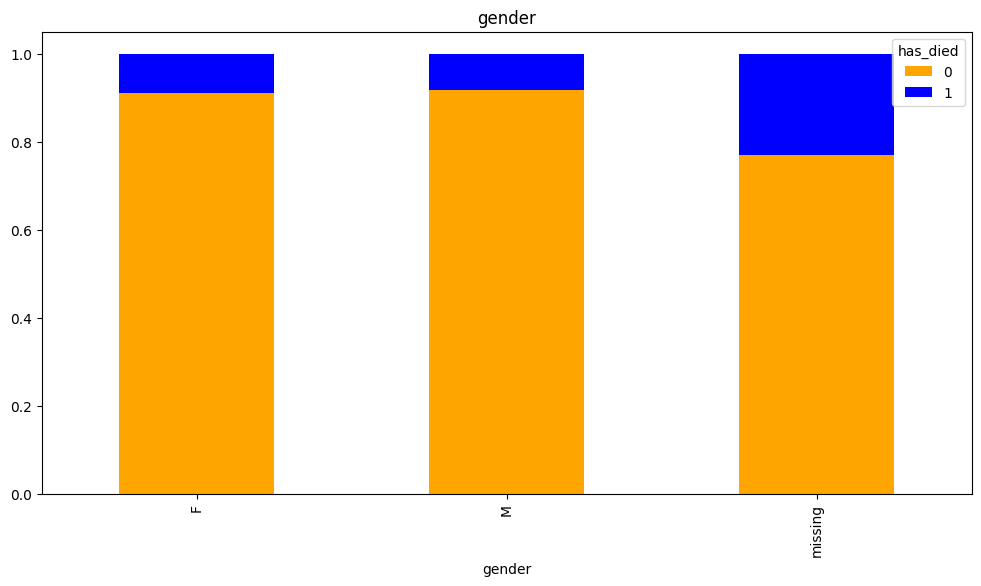

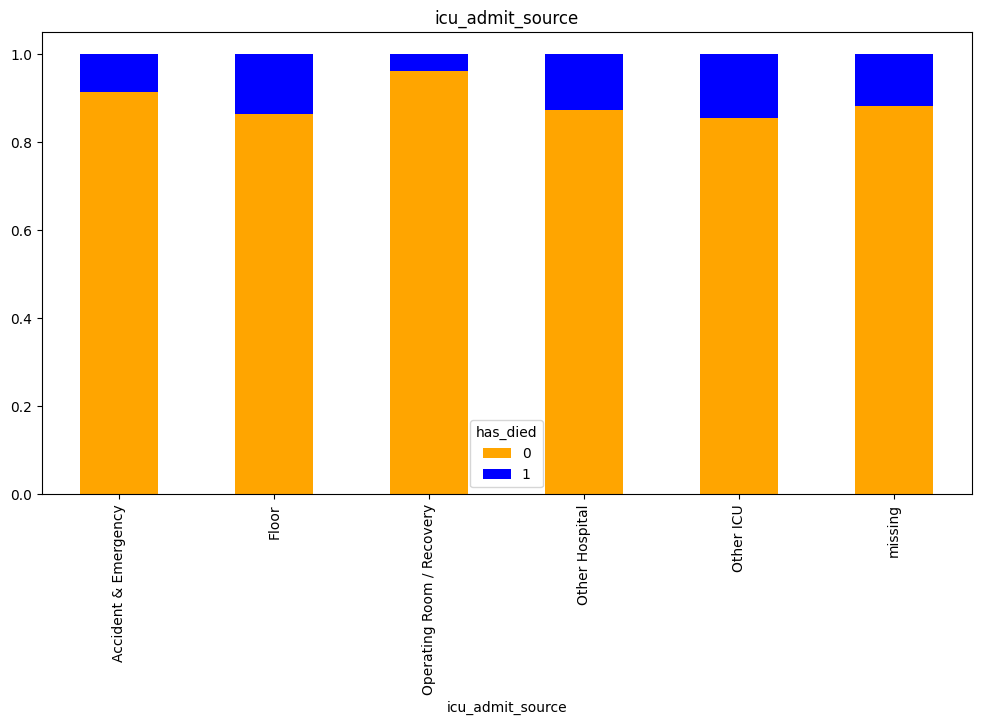

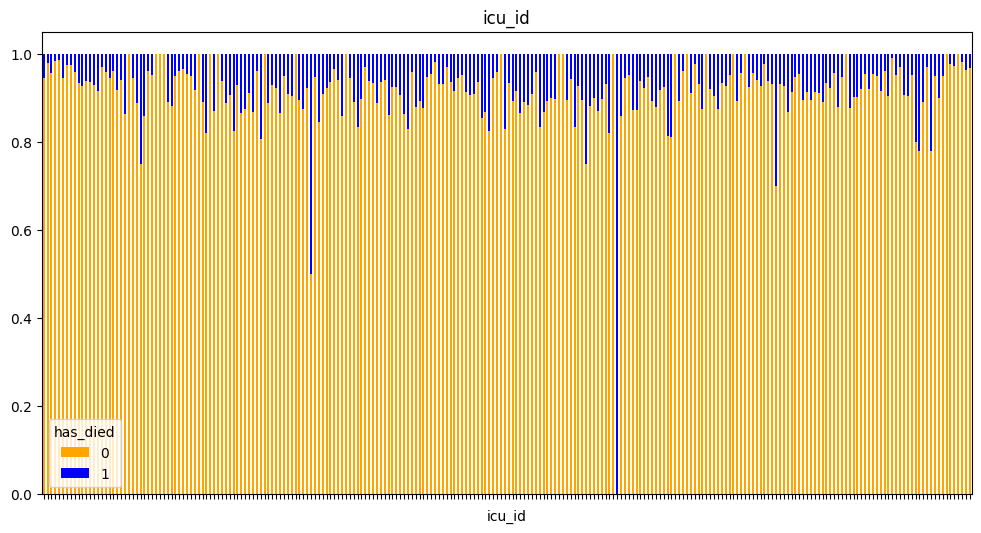

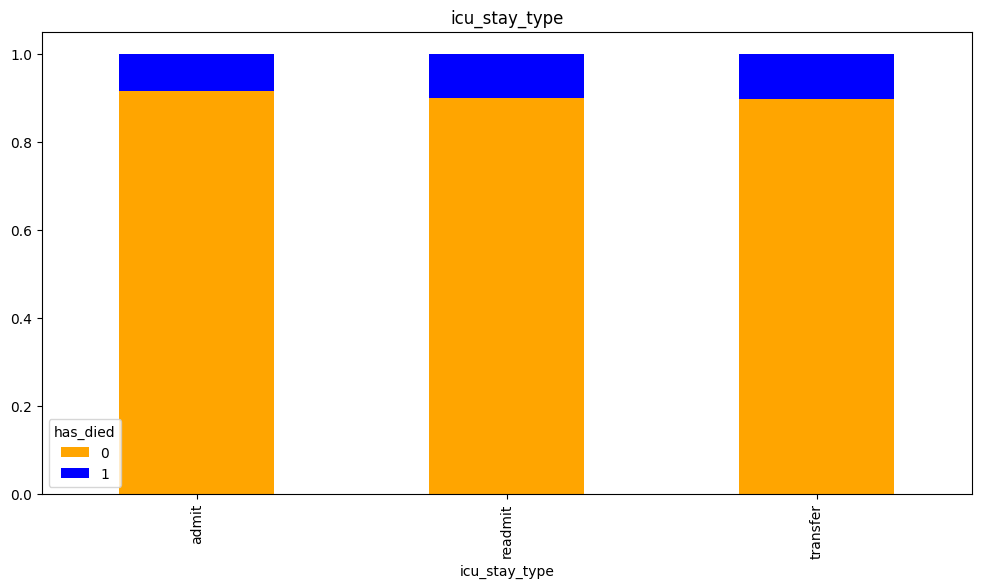

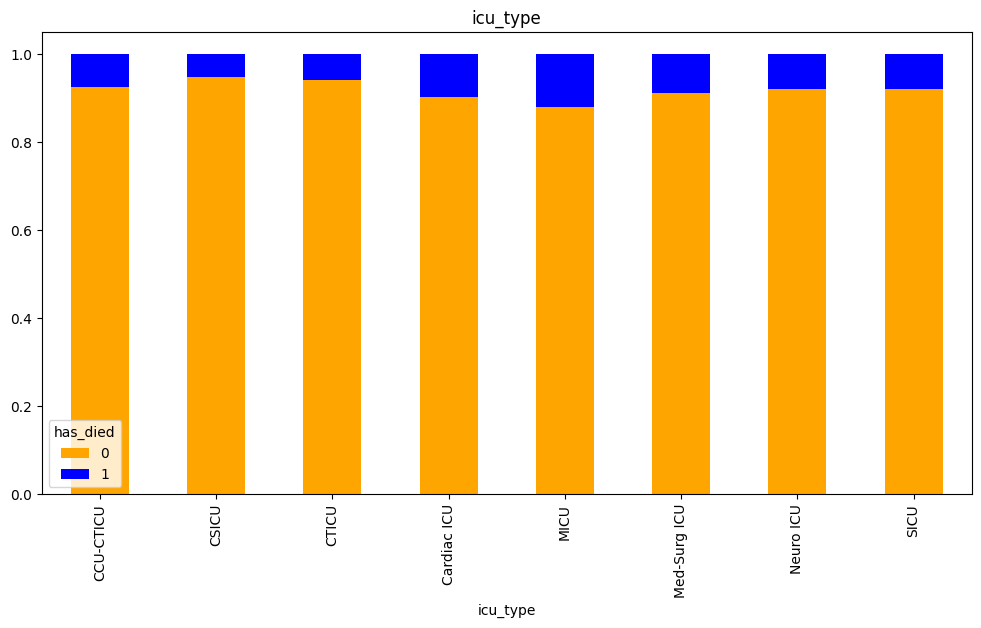

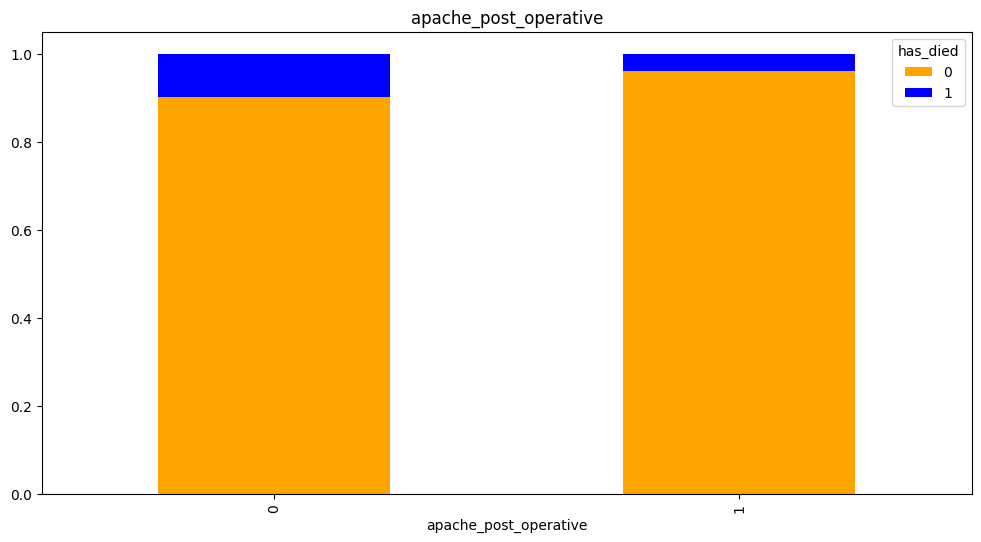

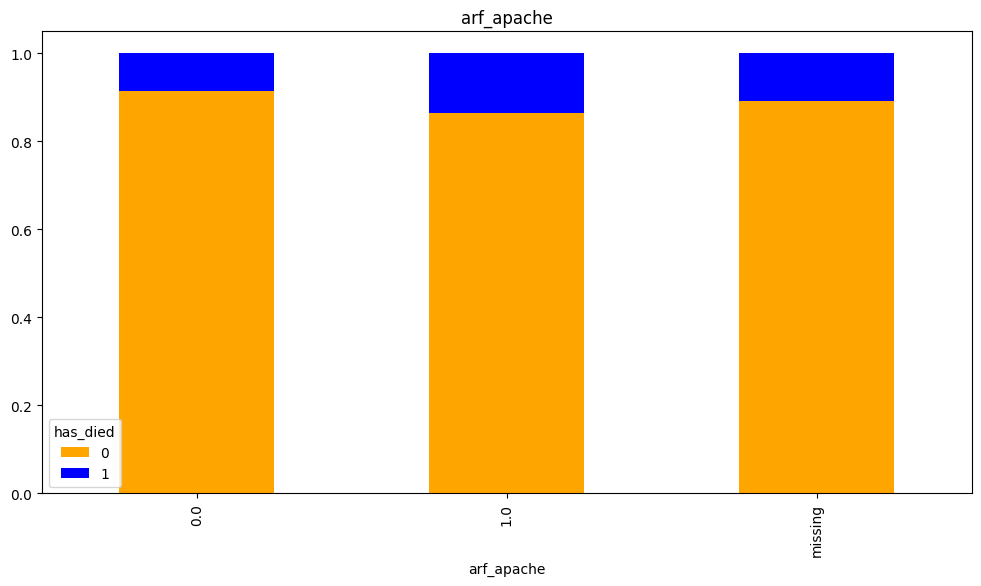

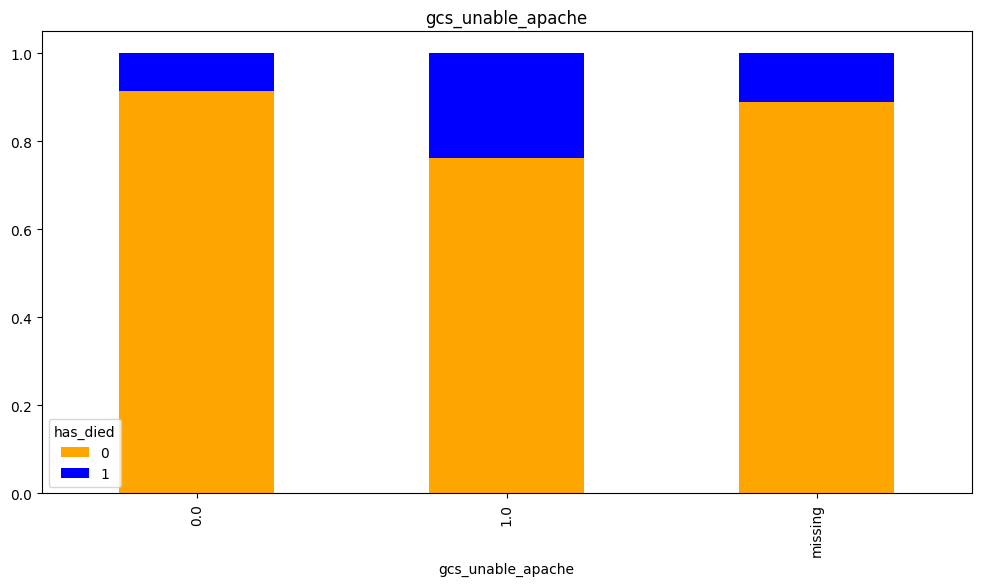

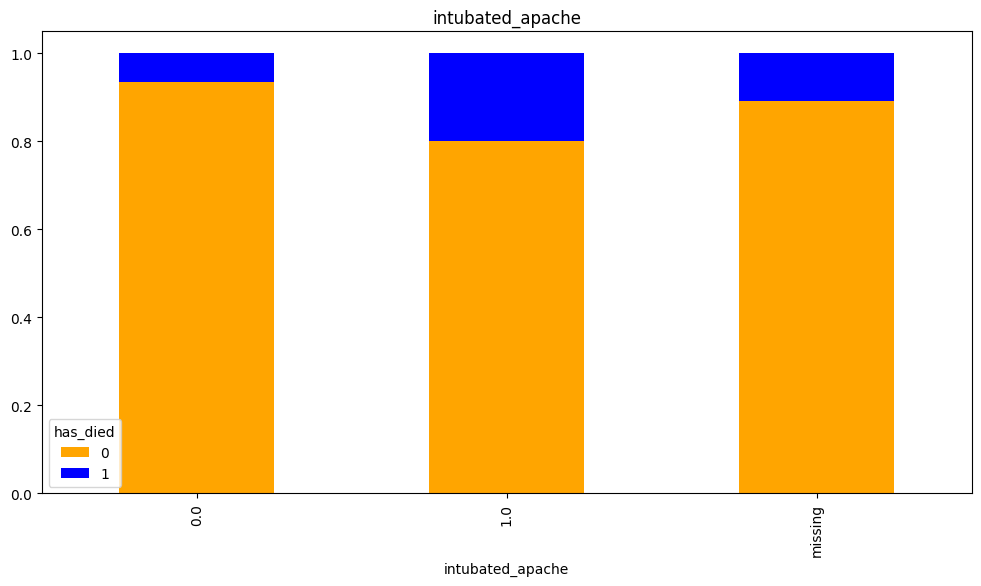

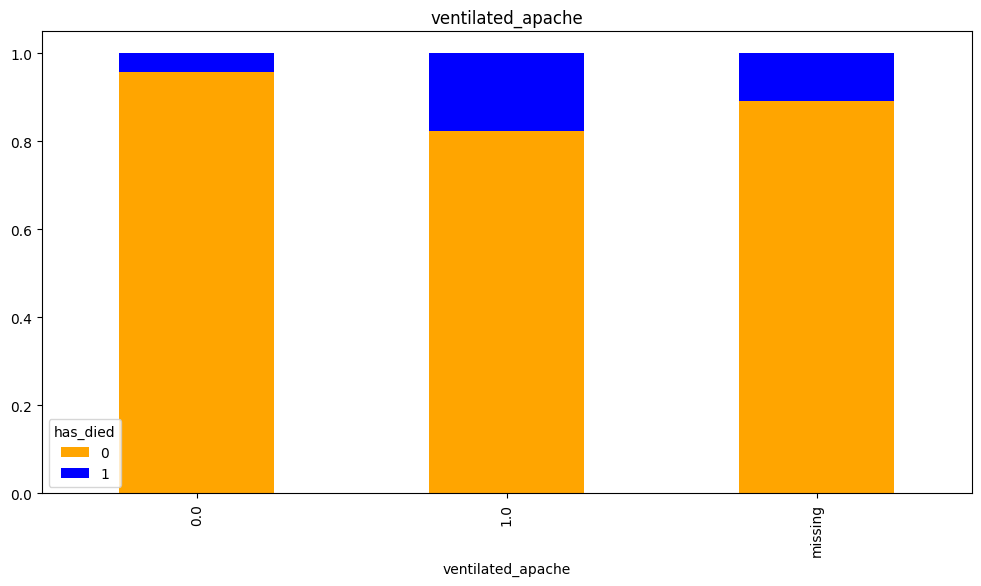

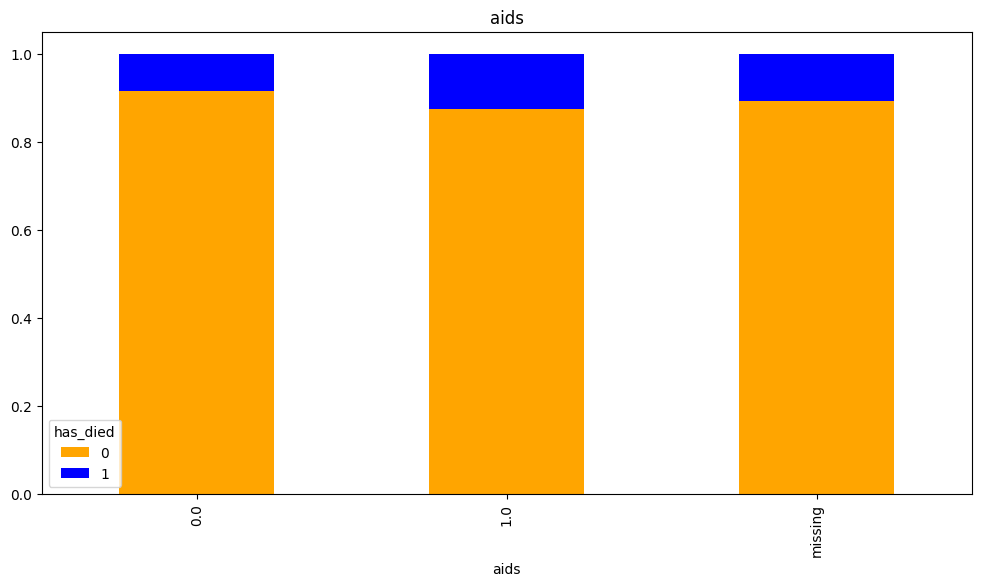

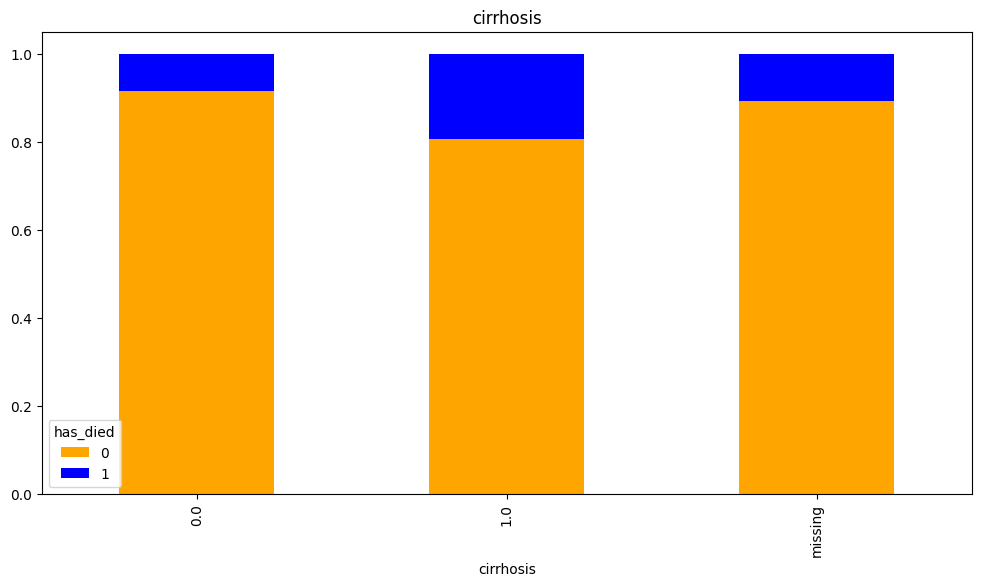

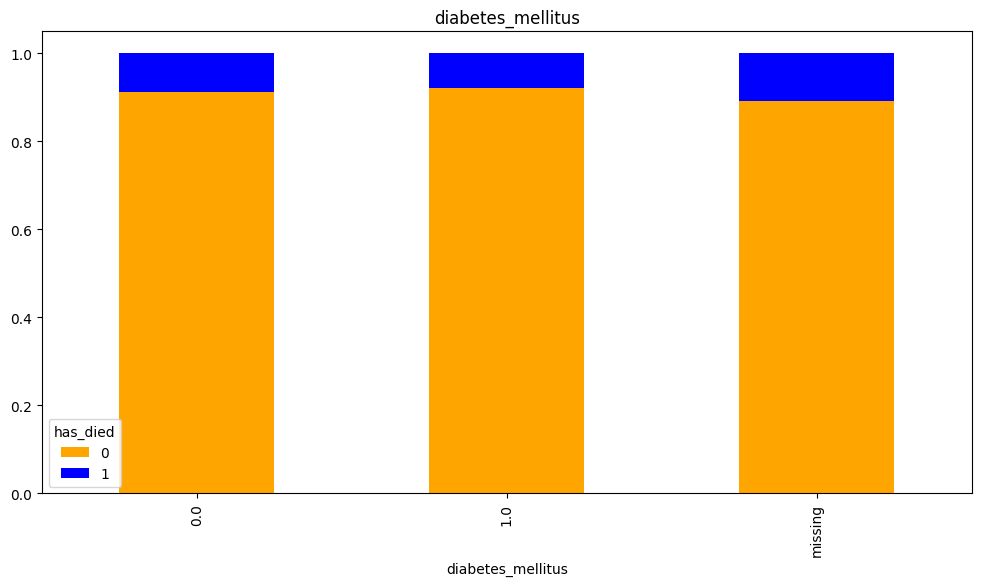

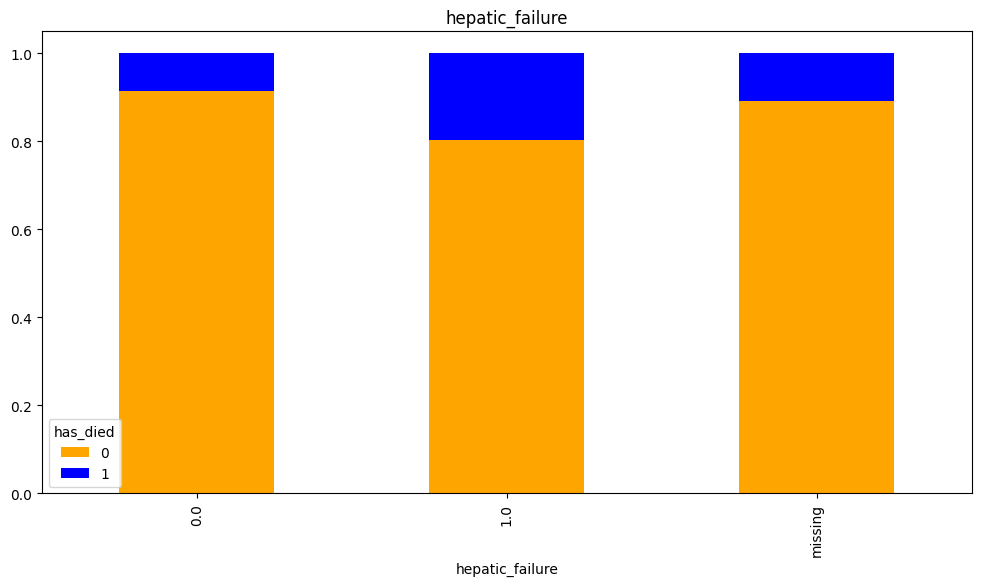

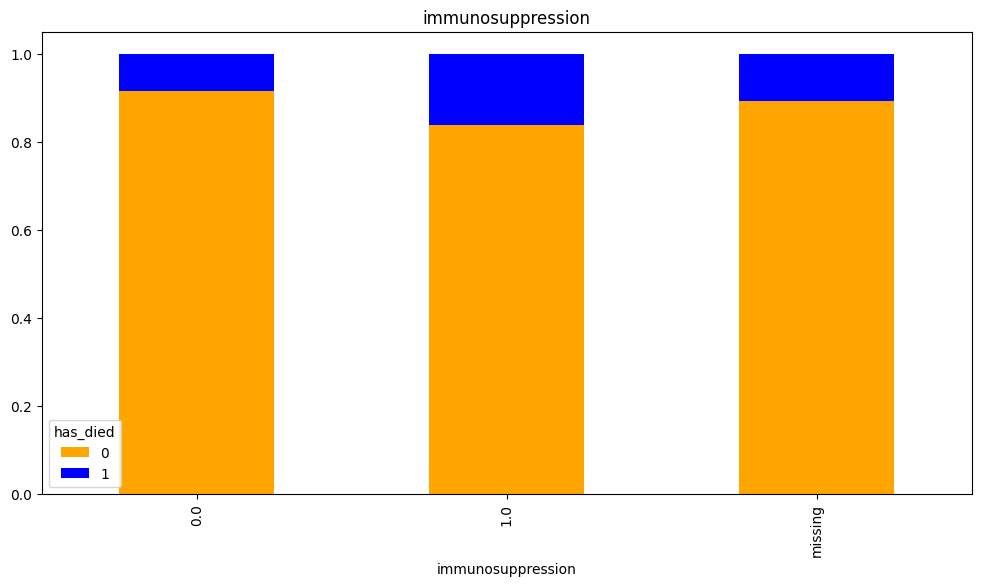

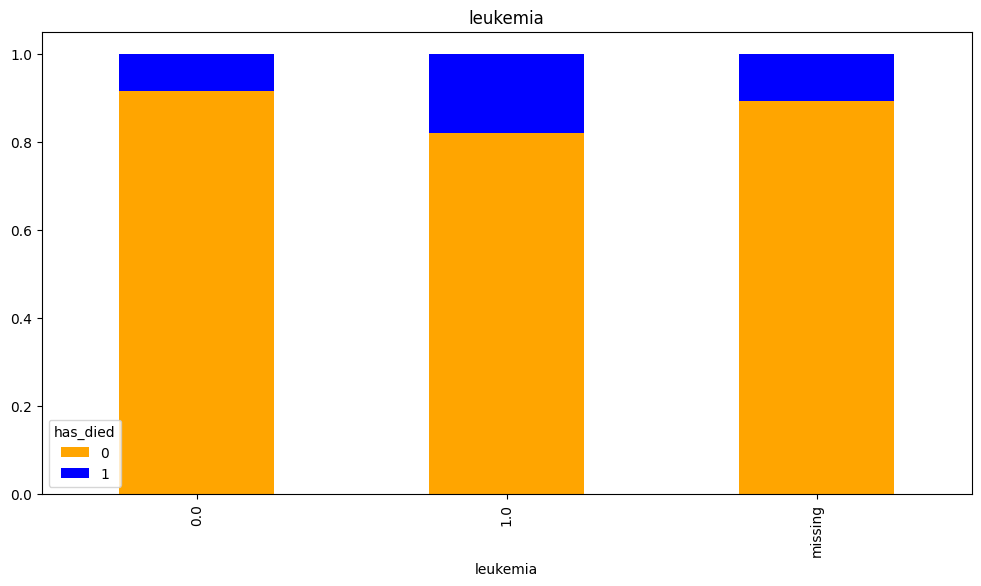

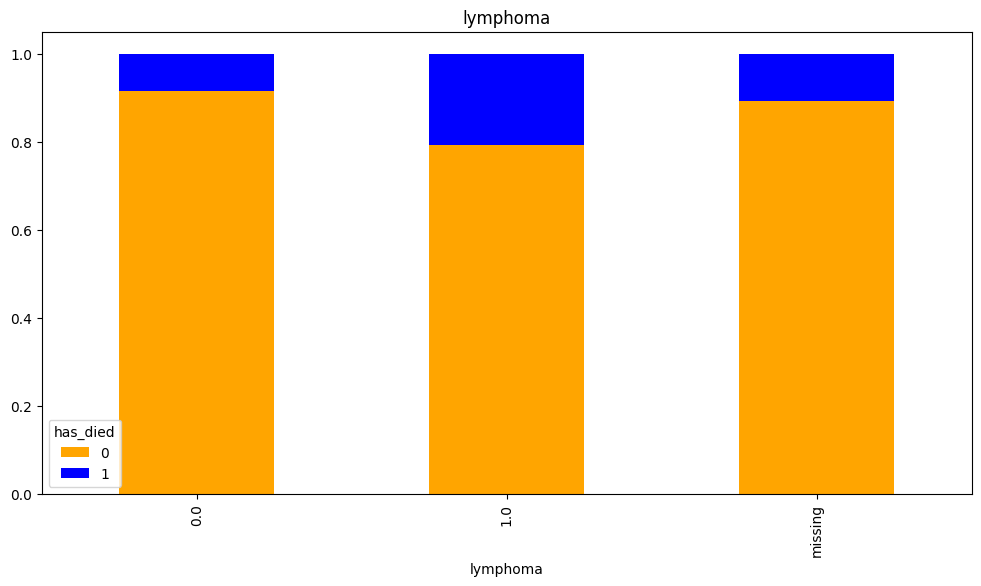

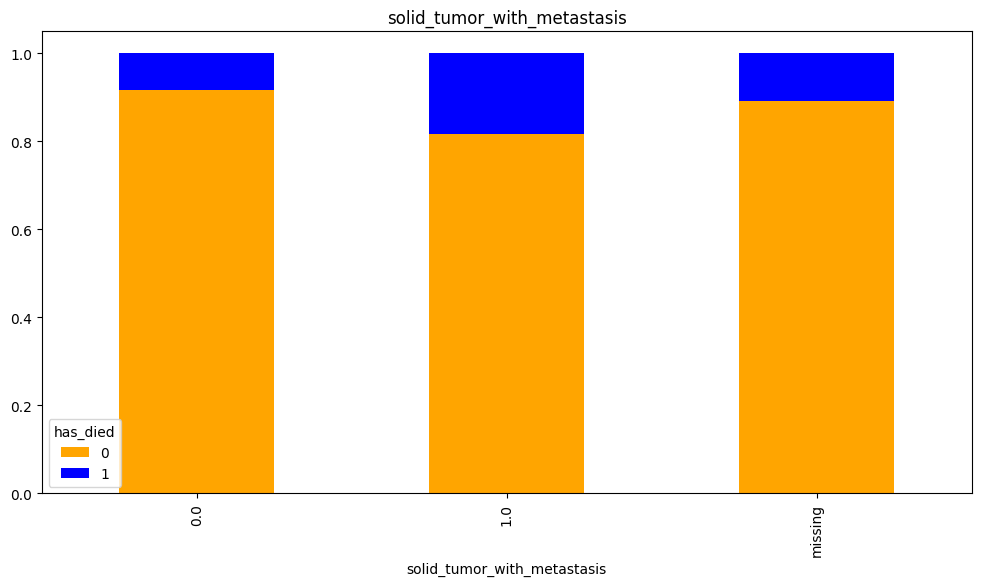

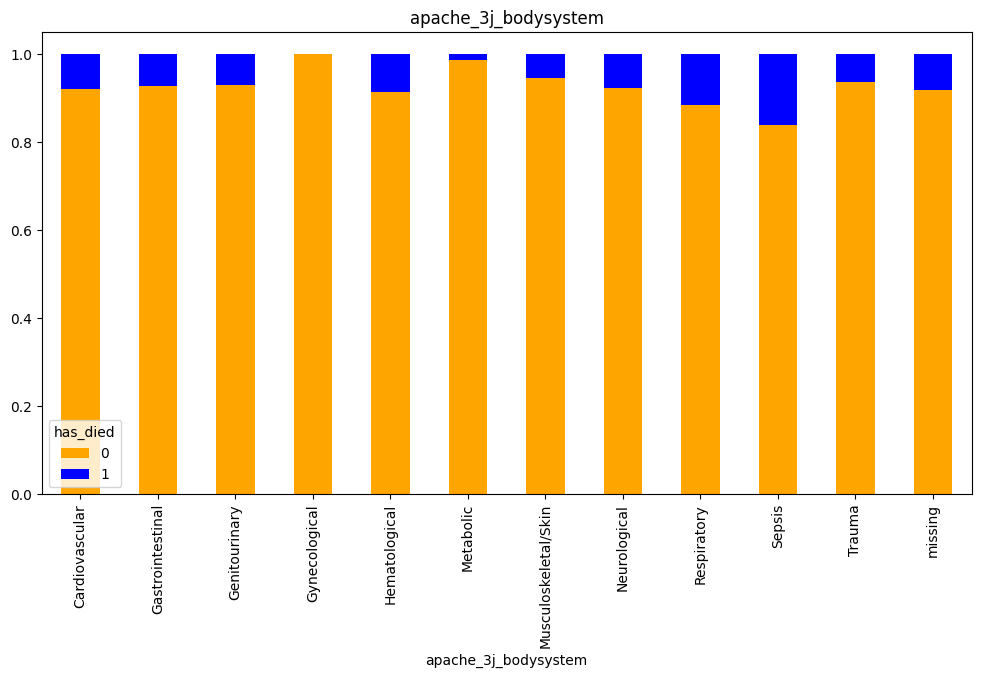

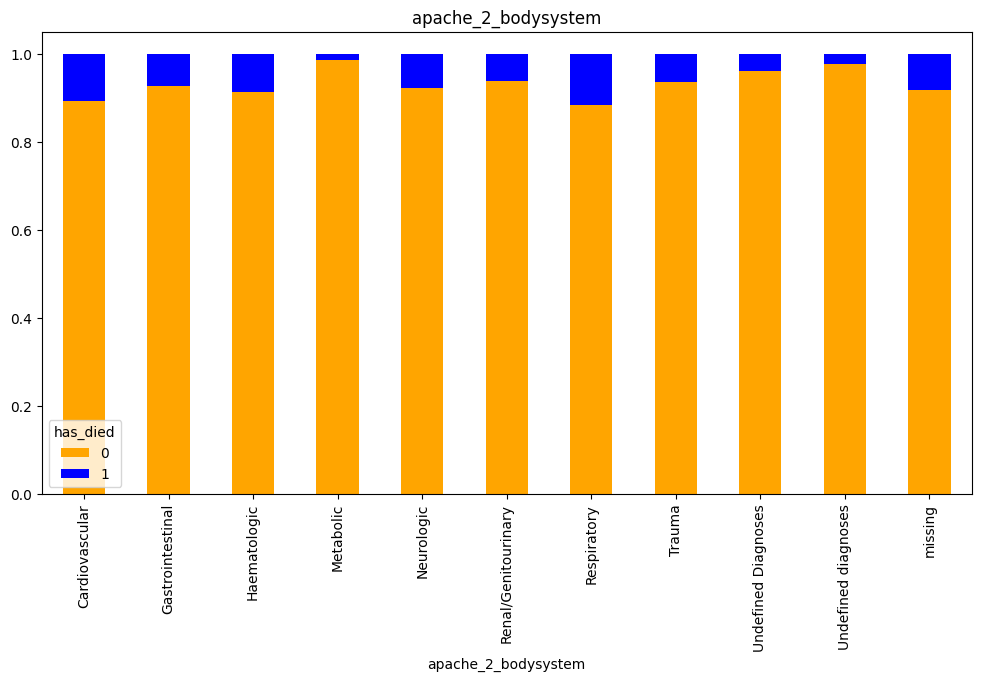

In [23]:
# show the distribution of each feature by plt
categorical_feature = ['hospital_id', 'elective_surgery', 'ethnicity', 'gender', 'icu_admit_source', 'icu_id', 'icu_stay_type', 'icu_type', 'apache_post_operative',
                       'arf_apache', 'gcs_unable_apache', 'intubated_apache', 'ventilated_apache', 'aids', 'cirrhosis', 'diabetes_mellitus', 'hepatic_failure',
                       'immunosuppression', 'leukemia', 'lymphoma', 'solid_tumor_with_metastasis', 'apache_3j_bodysystem', 'apache_2_bodysystem']
# fill missing value of categorical feature with 'missing'
fill_cat_nan = train_X[categorical_feature].fillna('missing')
# stacked bar chart for string categorical feature
# show the percentage of each label for each feature
# red for label 1, blue for label 0
merged_cat_train = fill_cat_nan.copy()
merged_cat_train['has_died'] = train_Y['has_died']
for feature in categorical_feature:
    # if feature == 'hospital_id', remove the x axis label
    temp = merged_cat_train.groupby([feature, 'has_died']).size().unstack()
    temp = temp.div(temp.sum(axis=1), axis=0)
    ax = temp.plot(kind='bar', stacked=True, title=feature, figsize=(12, 6), color=['orange', 'blue'])
    if feature == 'hospital_id' or feature == 'icu_id':
        ax.set_xticklabels([])
    plt.show()

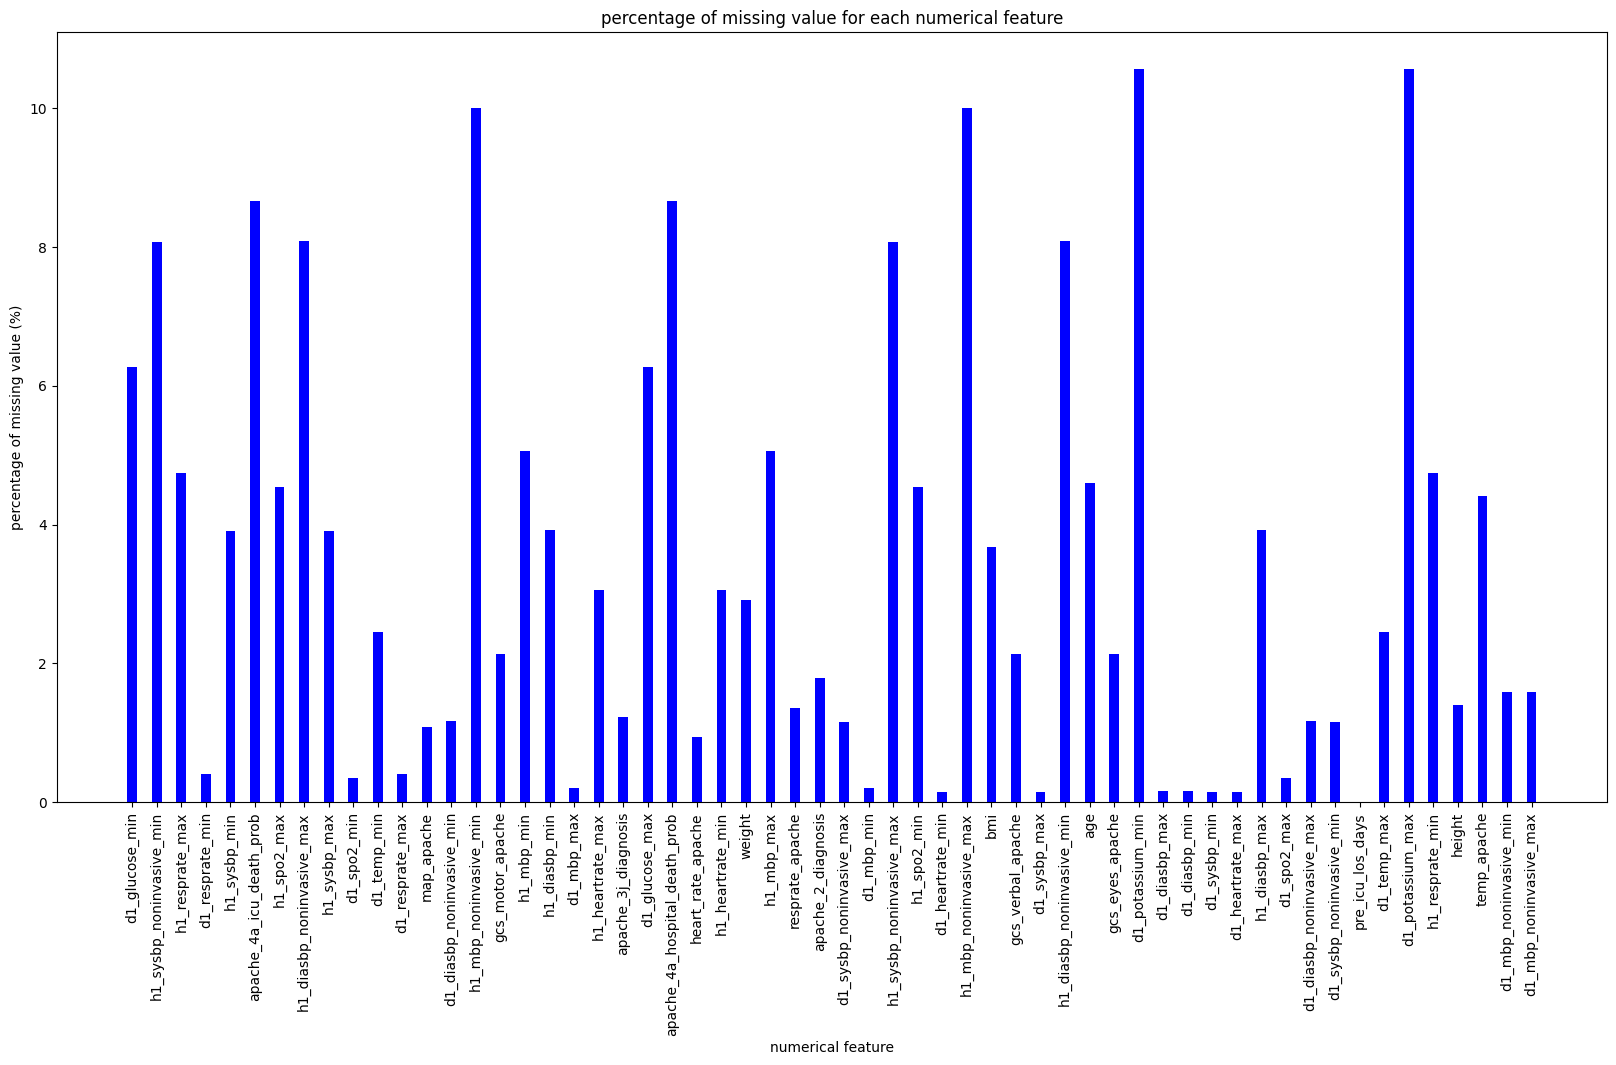

In [31]:
numerical_feature = set(train_X.columns) - set(categorical_feature)
numerical_feature = list(numerical_feature)

# plot of percentage of missing value for each numerical feature in one fig
missing_percentage = []
for feature in numerical_feature:
    missing_percentage.append(train_X[feature].isnull().sum() / len(train_X[feature]))
missing_percentage = np.array(missing_percentage) * 100
plt.figure(figsize=(20, 10))
plt.bar(numerical_feature, missing_percentage, color = 'blue', width = 0.4)
plt.xticks(rotation=90)
plt.xlabel('numerical feature')
plt.ylabel('percentage of missing value (%)')
plt.title('percentage of missing value for each numerical feature')
plt.show()

feature: d1_glucose_min


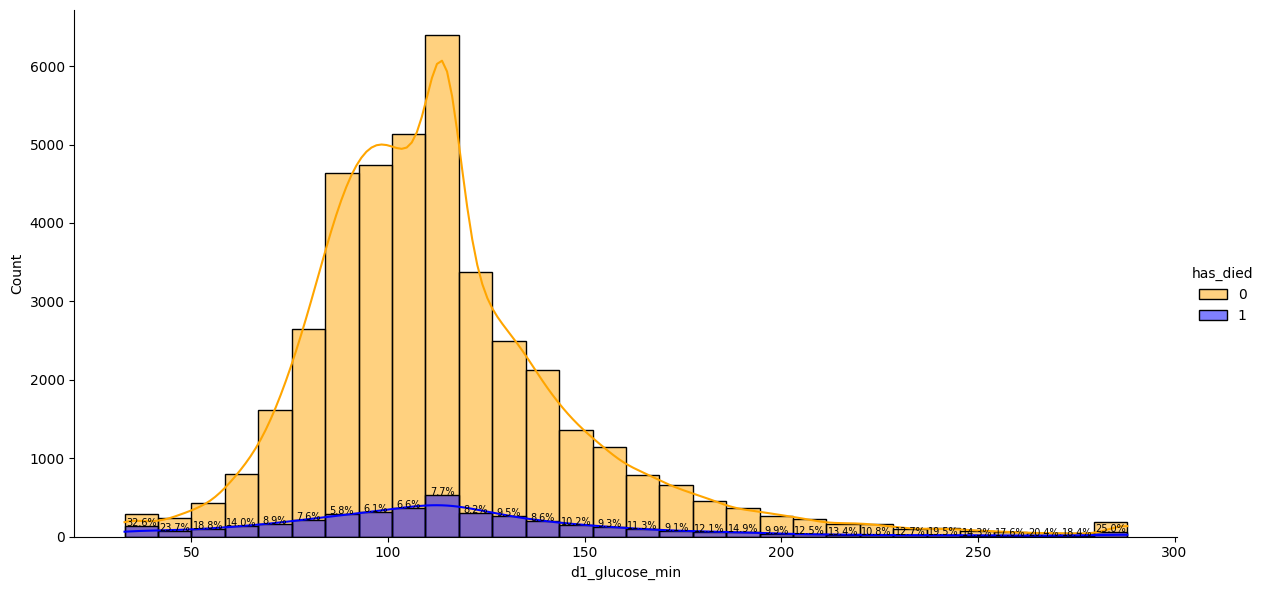

feature: h1_sysbp_noninvasive_min


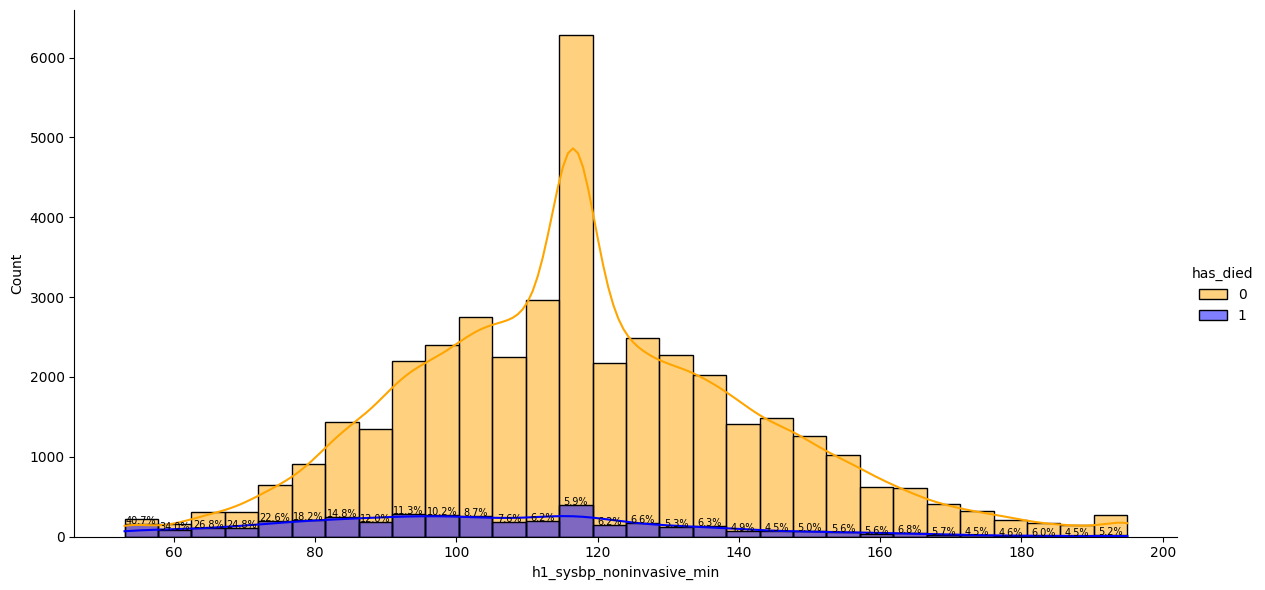

feature: h1_resprate_max


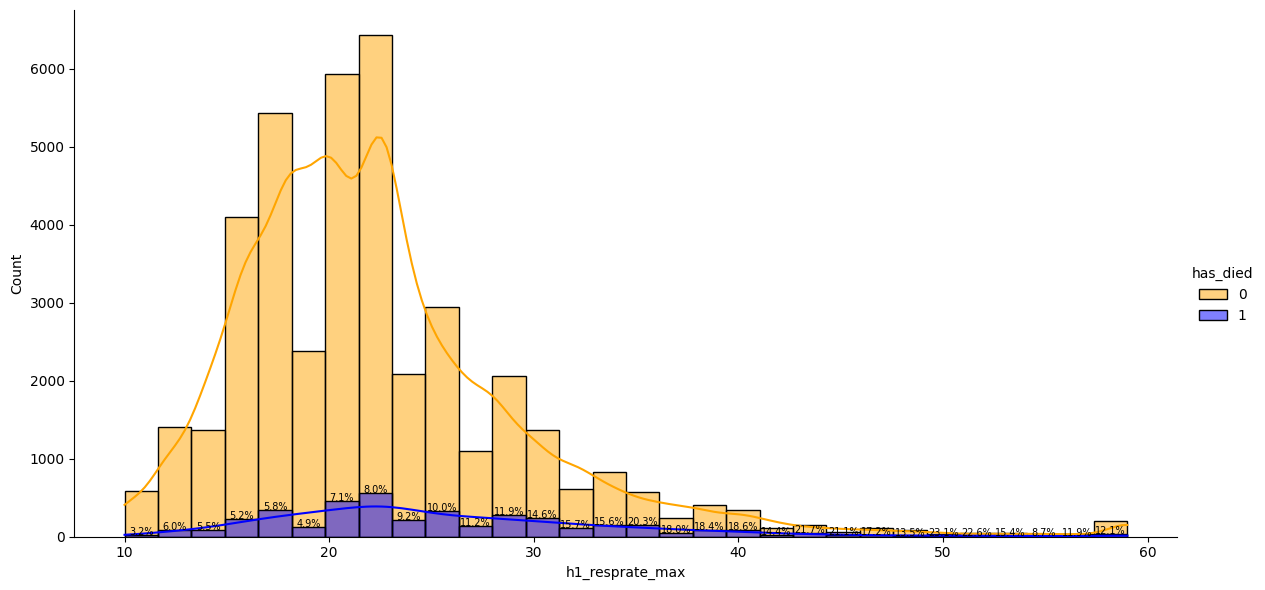

feature: d1_resprate_min


C:\Users\lab\AppData\Local\Temp\ipykernel_1872\3289245819.py:24: RuntimeWarning: divide by zero encountered in divide
  percentages = (bin_heights / hist_data_all[0]) * 100
C:\Users\lab\AppData\Local\Temp\ipykernel_1872\3289245819.py:24: RuntimeWarning: invalid value encountered in divide
  percentages = (bin_heights / hist_data_all[0]) * 100


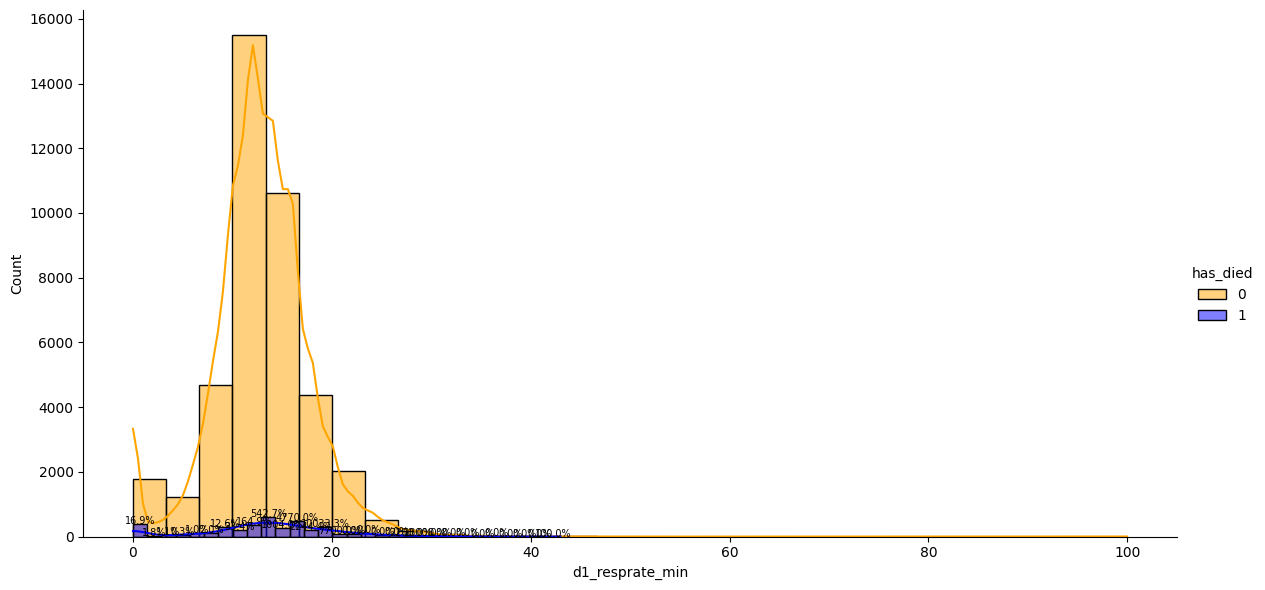

feature: h1_sysbp_min


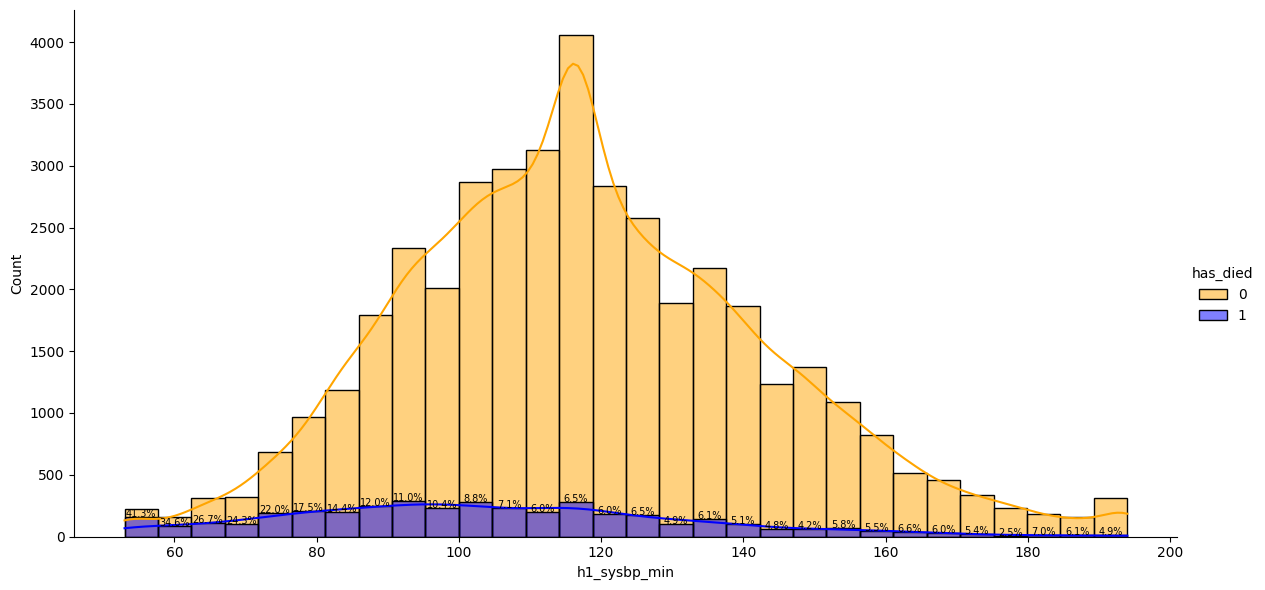

feature: apache_4a_icu_death_prob


C:\Users\lab\AppData\Local\Temp\ipykernel_1872\3289245819.py:24: RuntimeWarning: invalid value encountered in divide
  percentages = (bin_heights / hist_data_all[0]) * 100


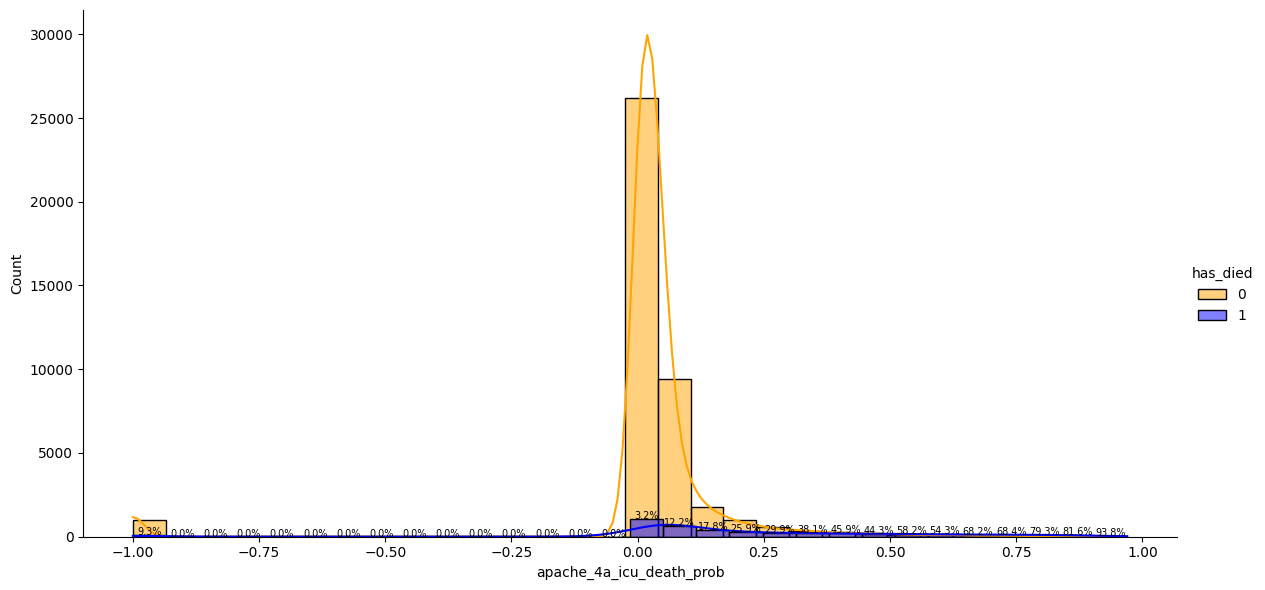

feature: h1_spo2_max


C:\Users\lab\AppData\Local\Temp\ipykernel_1872\3289245819.py:24: RuntimeWarning: divide by zero encountered in divide
  percentages = (bin_heights / hist_data_all[0]) * 100
C:\Users\lab\AppData\Local\Temp\ipykernel_1872\3289245819.py:24: RuntimeWarning: invalid value encountered in divide
  percentages = (bin_heights / hist_data_all[0]) * 100


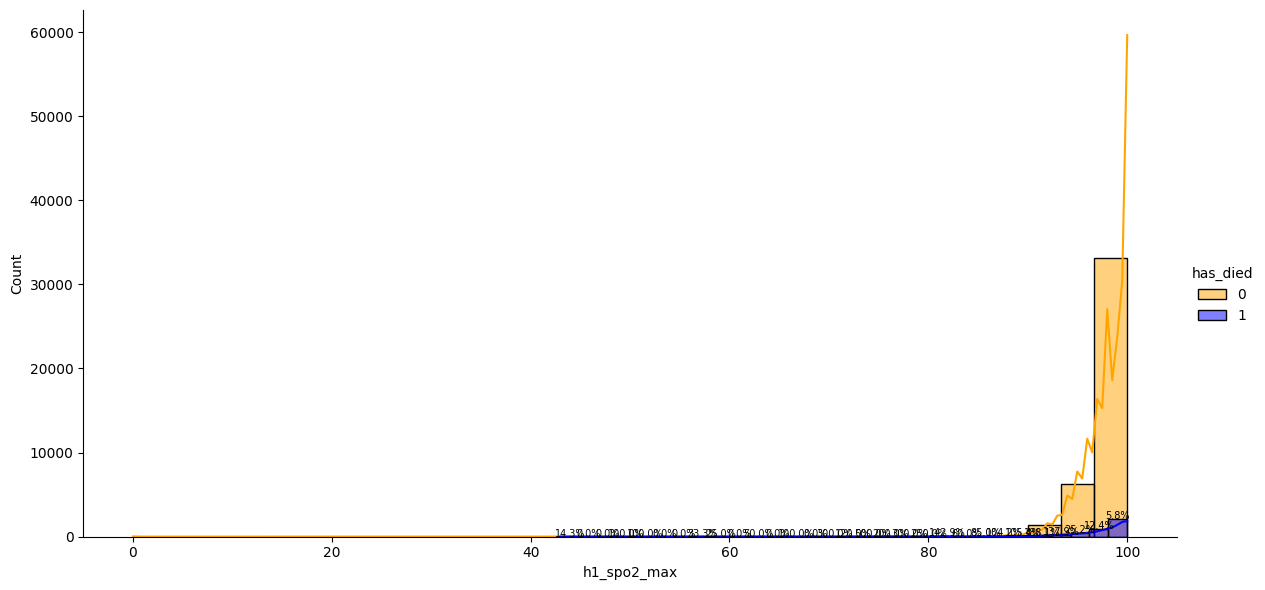

feature: h1_diasbp_noninvasive_max


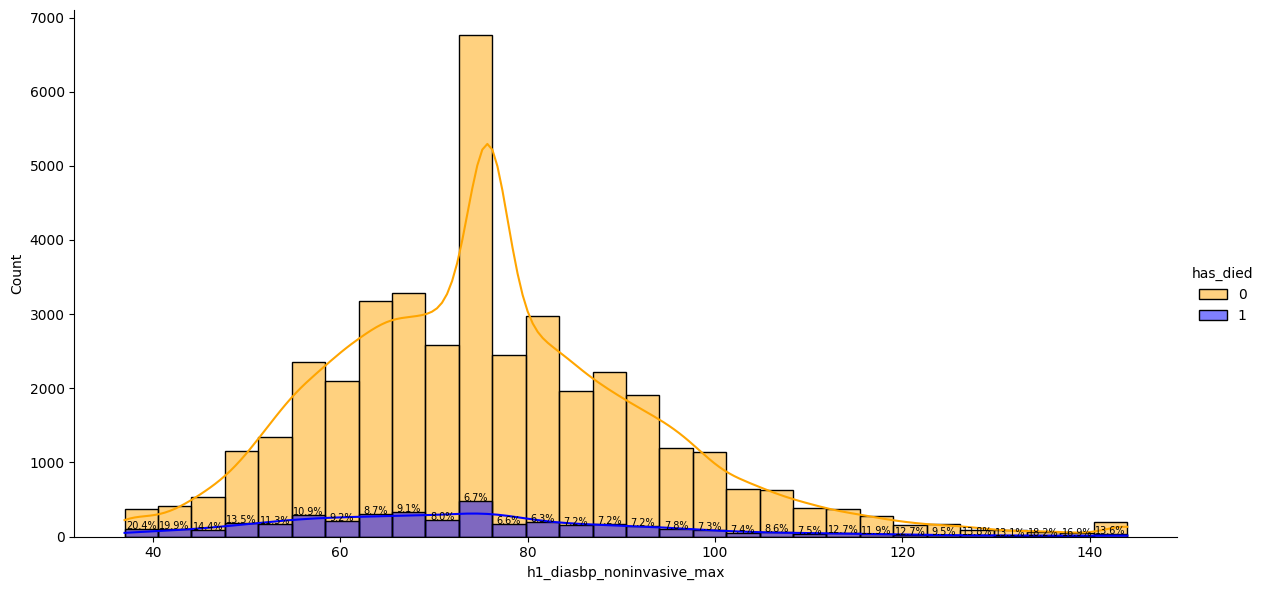

feature: h1_sysbp_max


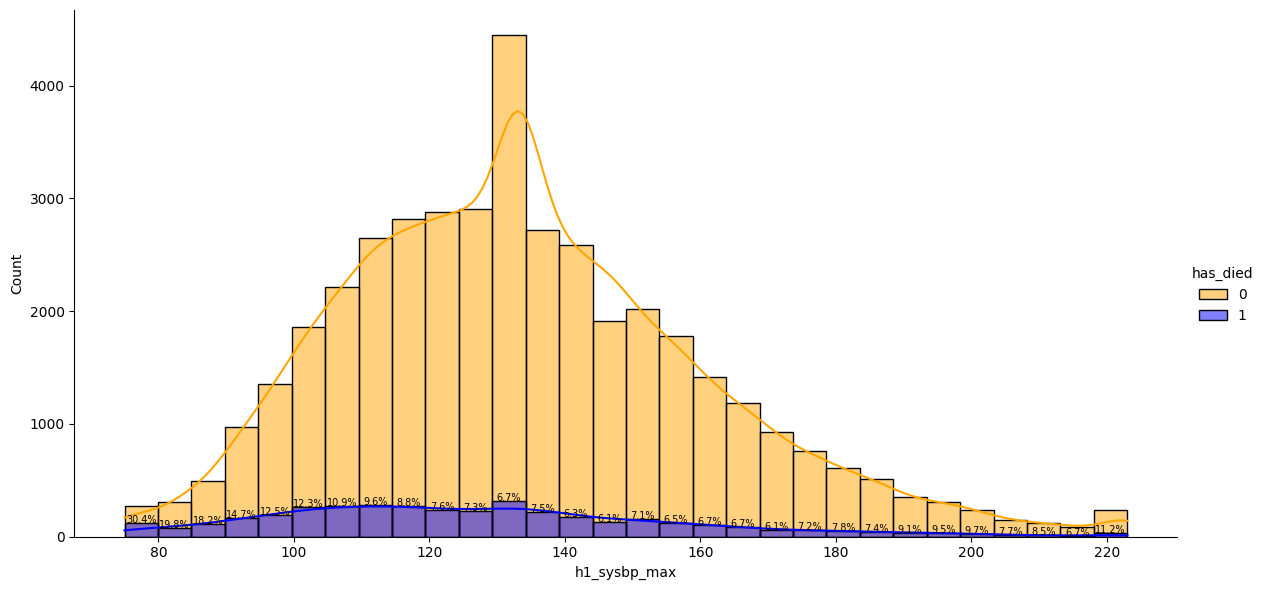

feature: d1_spo2_min


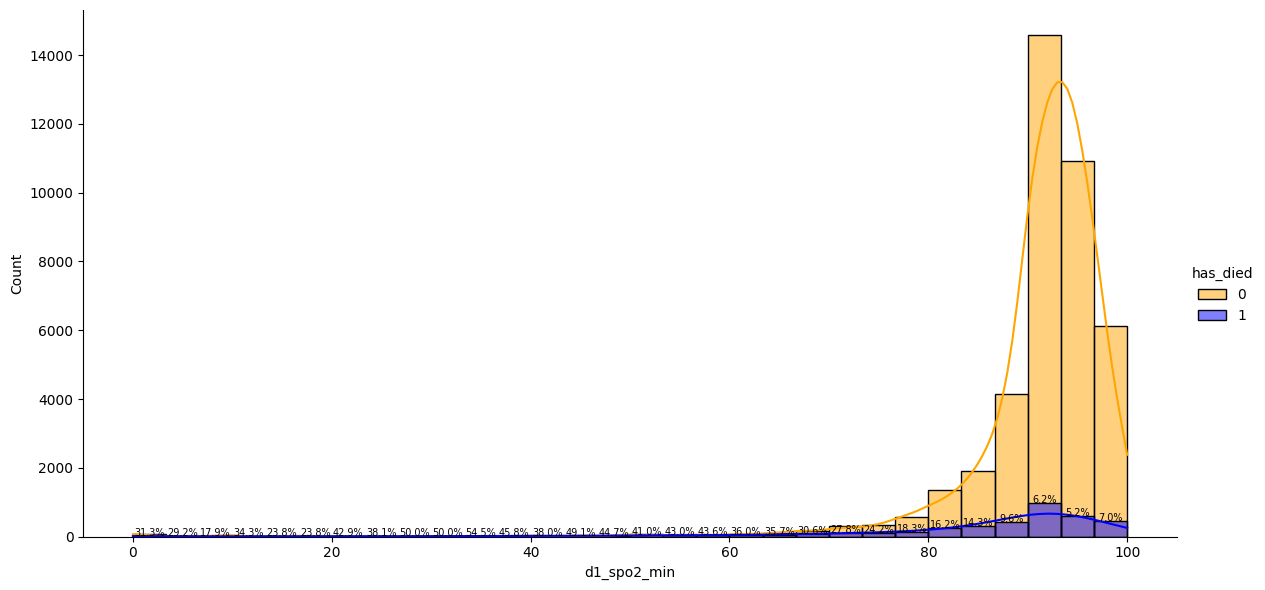

feature: d1_temp_min


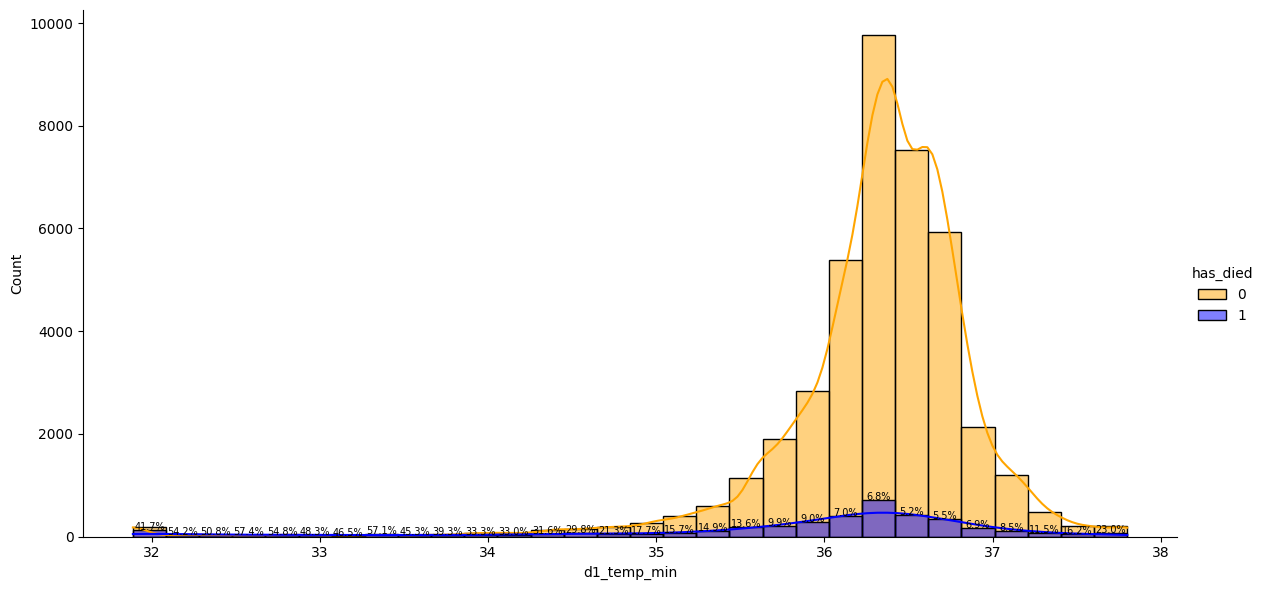

feature: d1_resprate_max


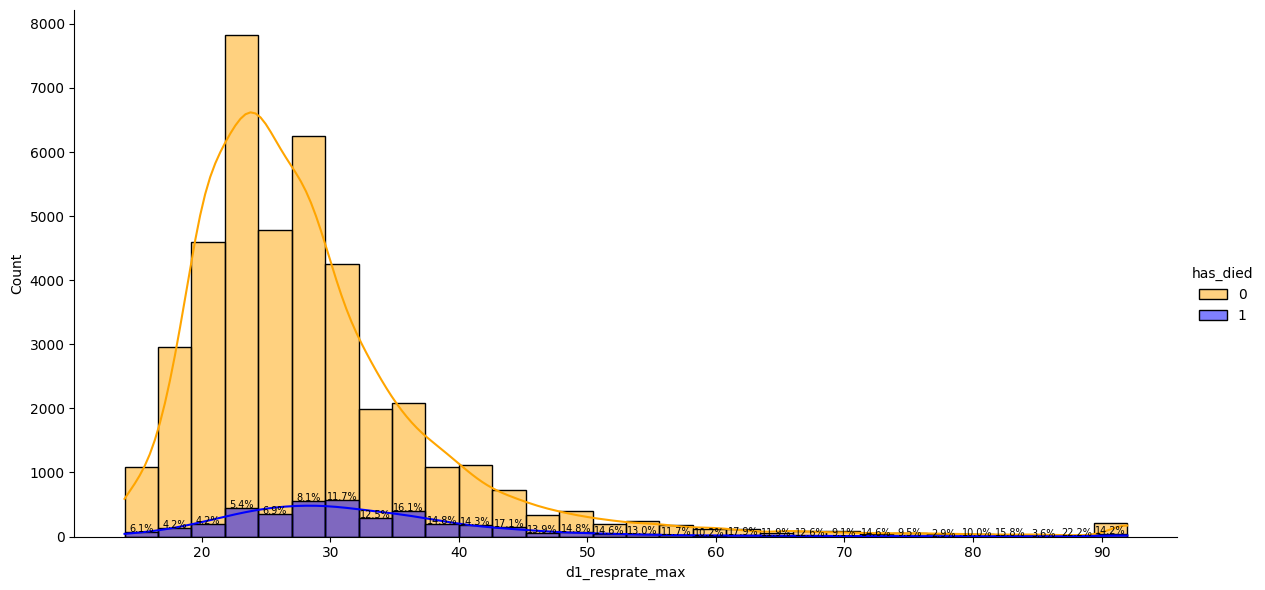

feature: map_apache


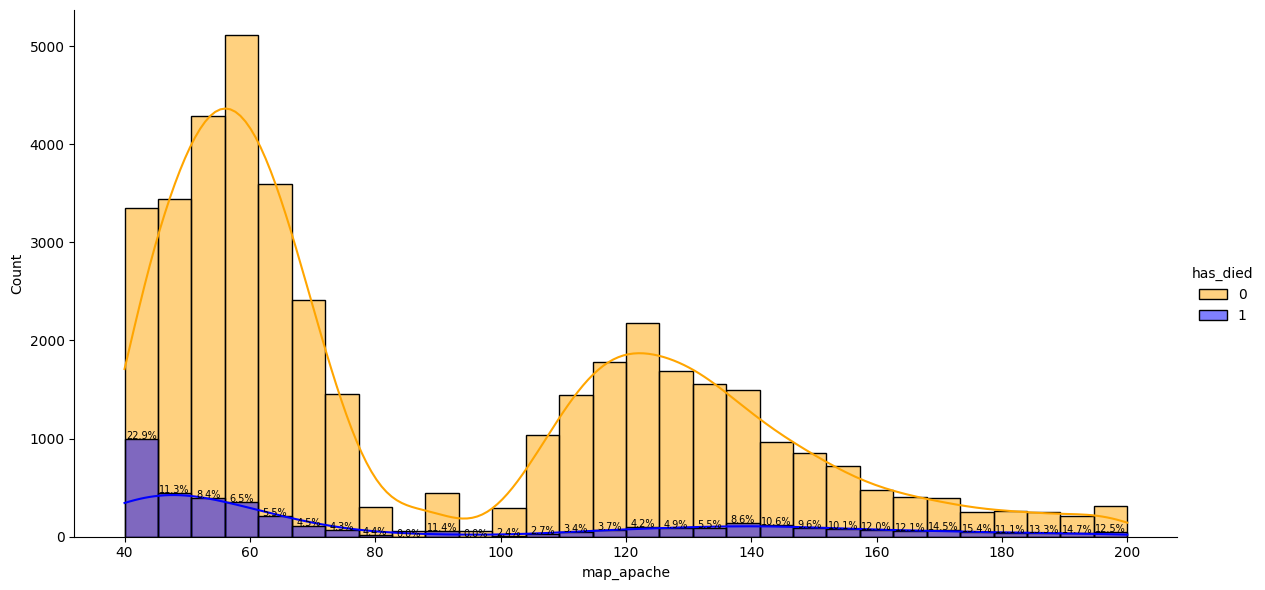

feature: d1_diasbp_noninvasive_min


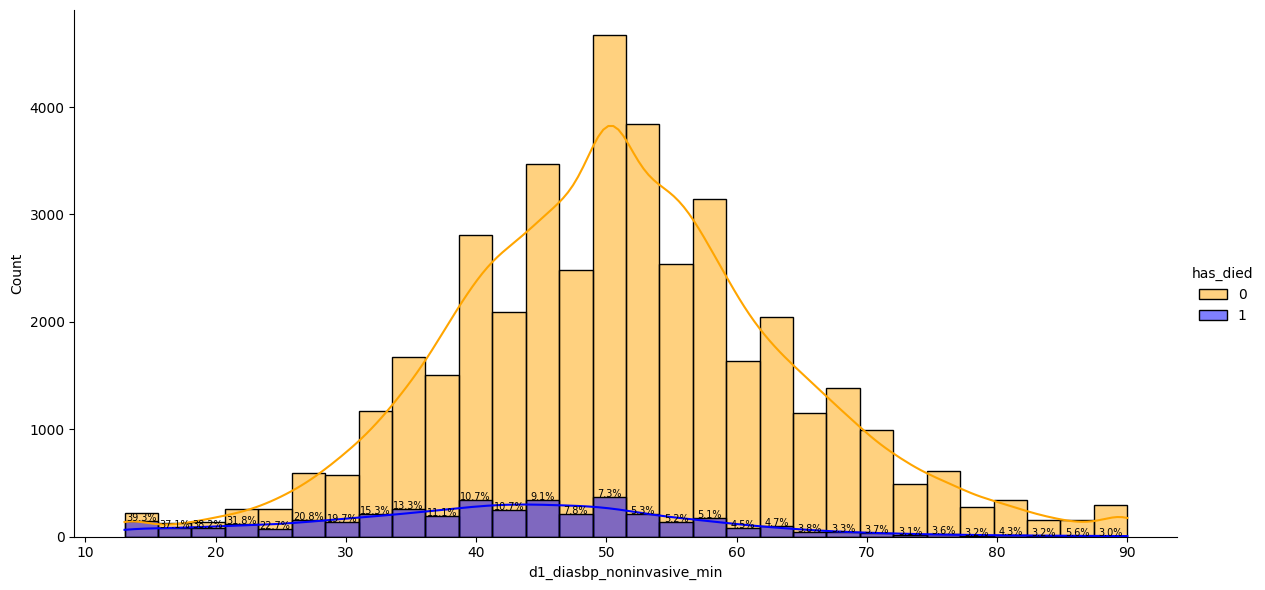

feature: h1_mbp_noninvasive_min


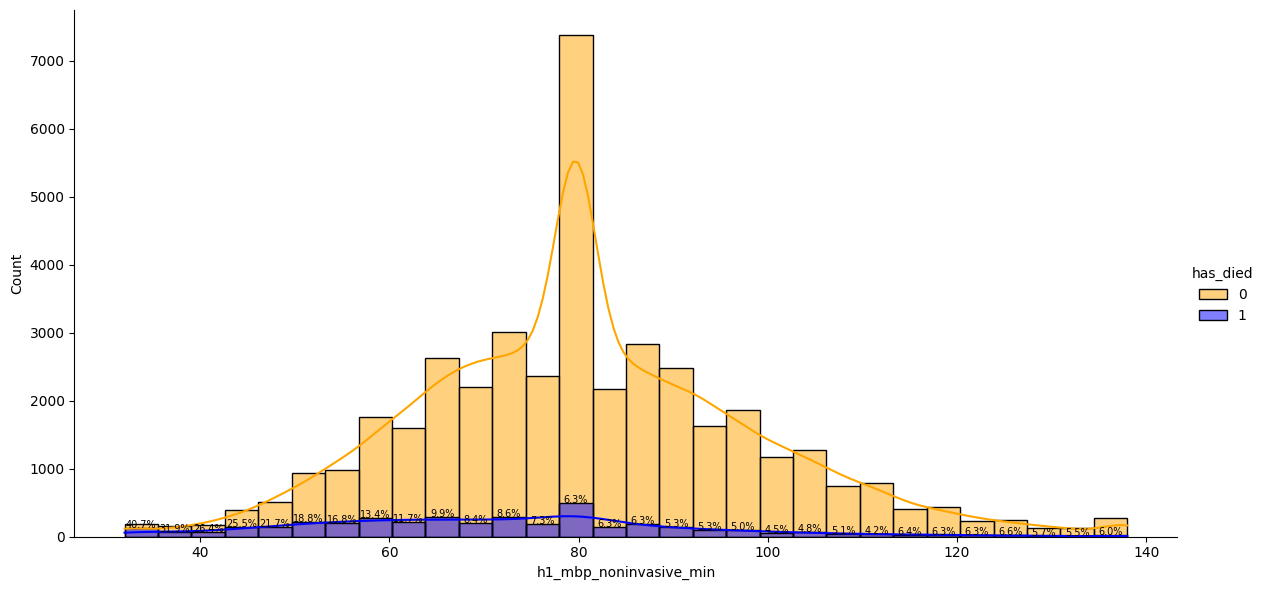

feature: gcs_motor_apache


C:\Users\lab\AppData\Local\Temp\ipykernel_1872\3289245819.py:24: RuntimeWarning: invalid value encountered in divide
  percentages = (bin_heights / hist_data_all[0]) * 100


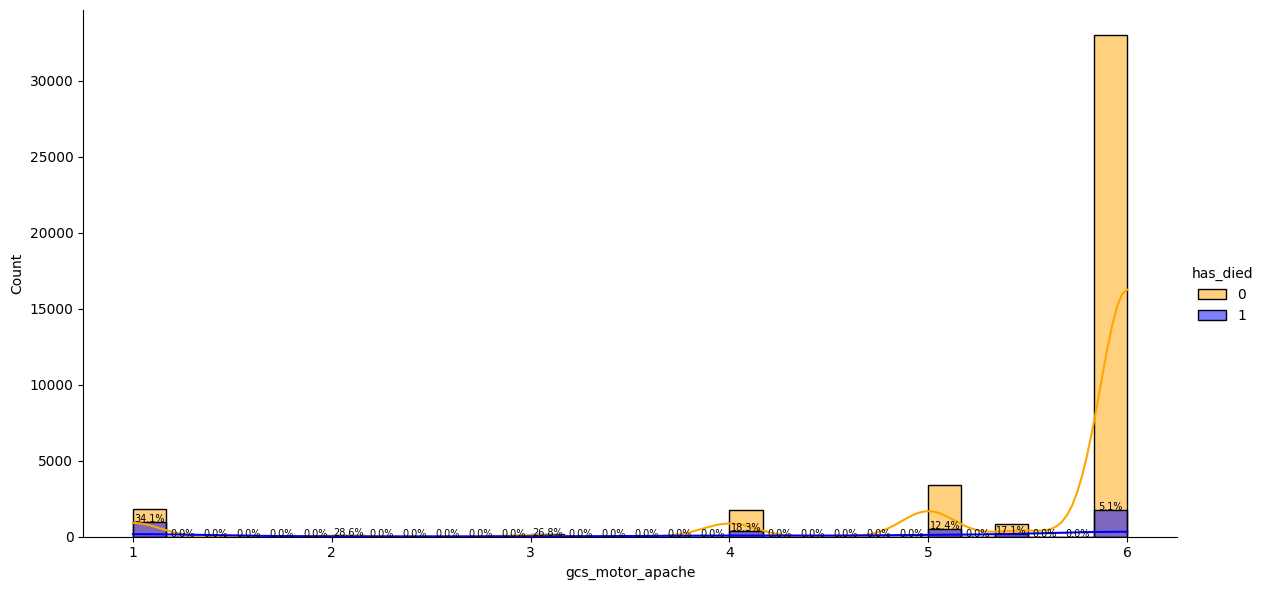

feature: h1_mbp_min


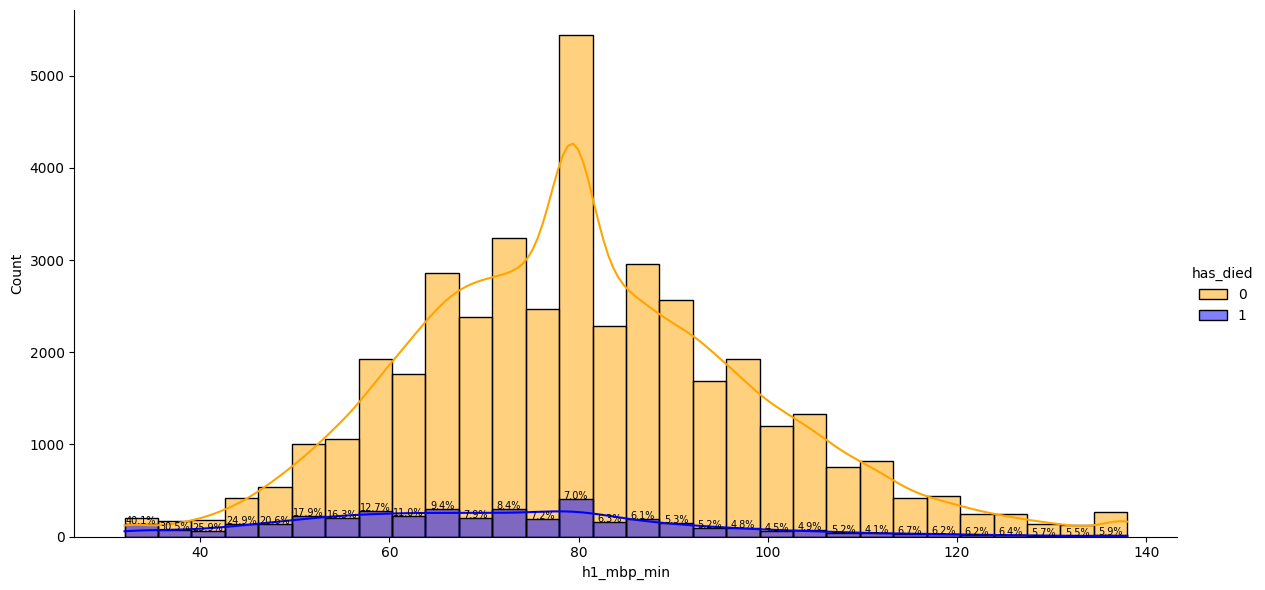

feature: h1_diasbp_min


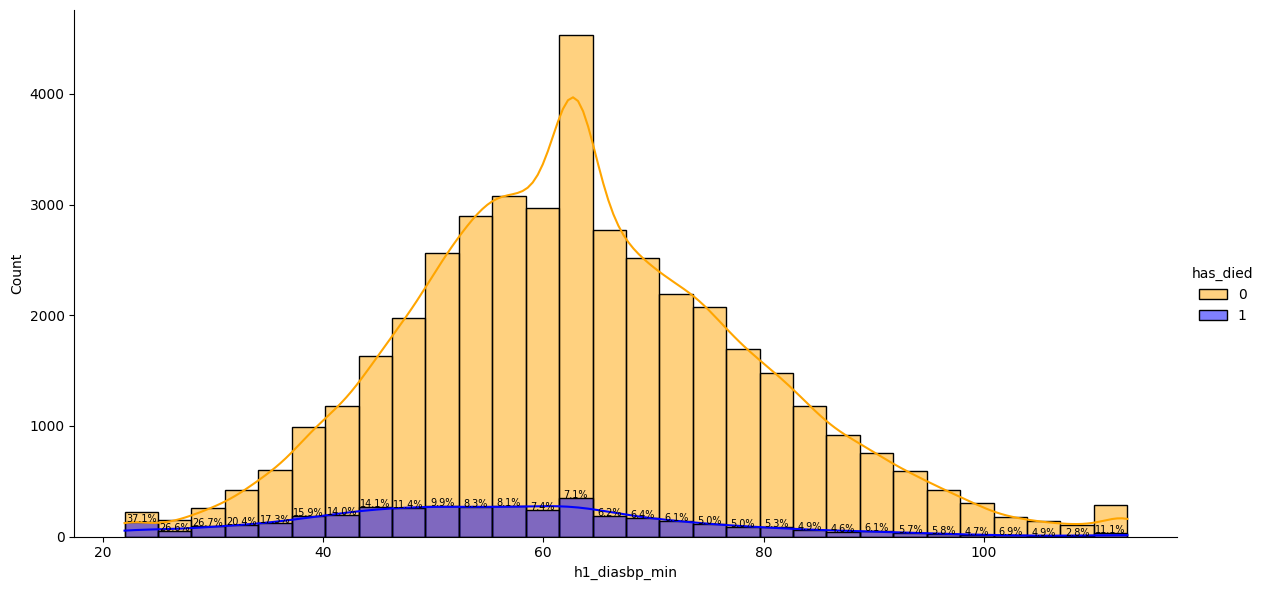

feature: d1_mbp_max


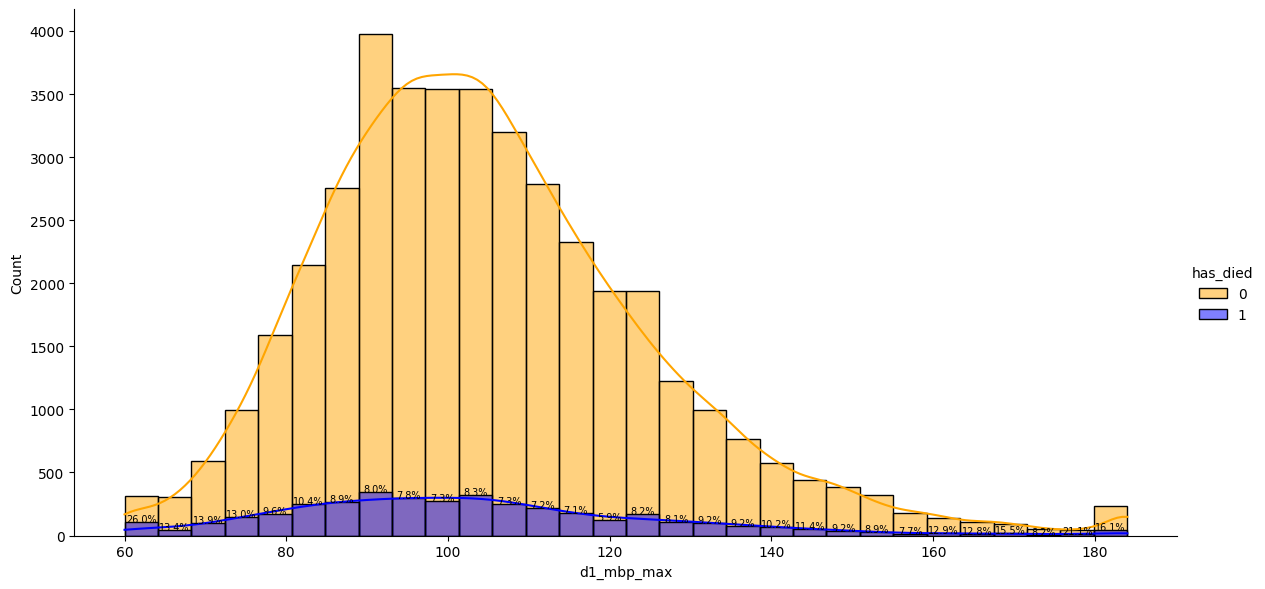

feature: h1_heartrate_max


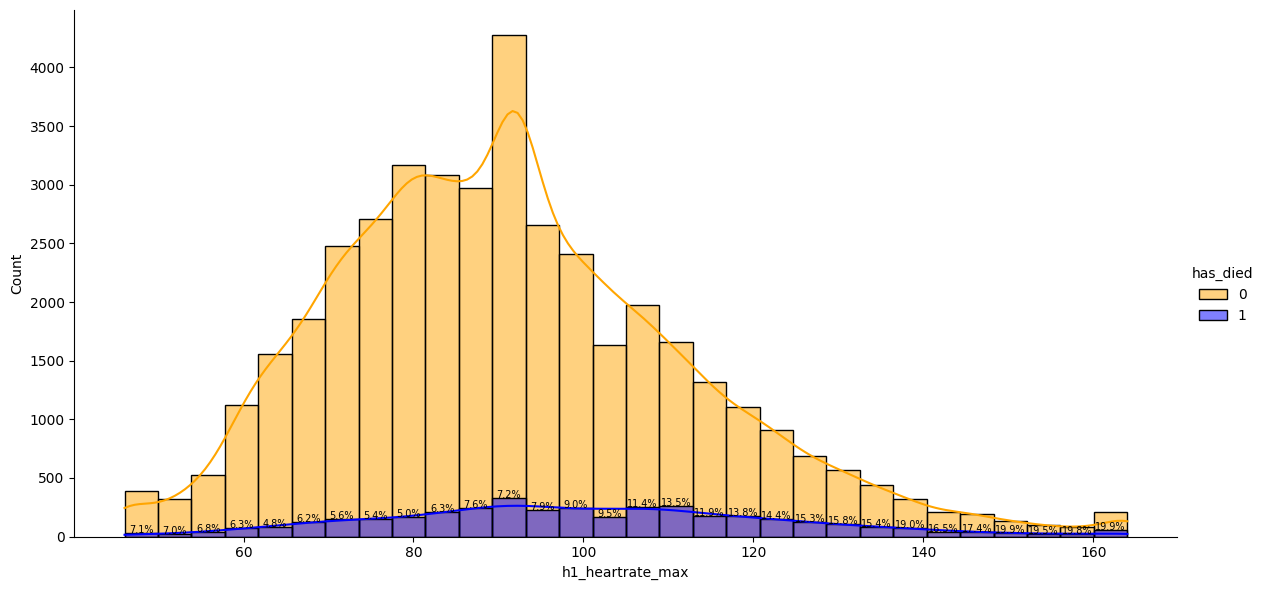

feature: apache_3j_diagnosis


C:\Users\lab\AppData\Local\Temp\ipykernel_1872\3289245819.py:24: RuntimeWarning: invalid value encountered in divide
  percentages = (bin_heights / hist_data_all[0]) * 100


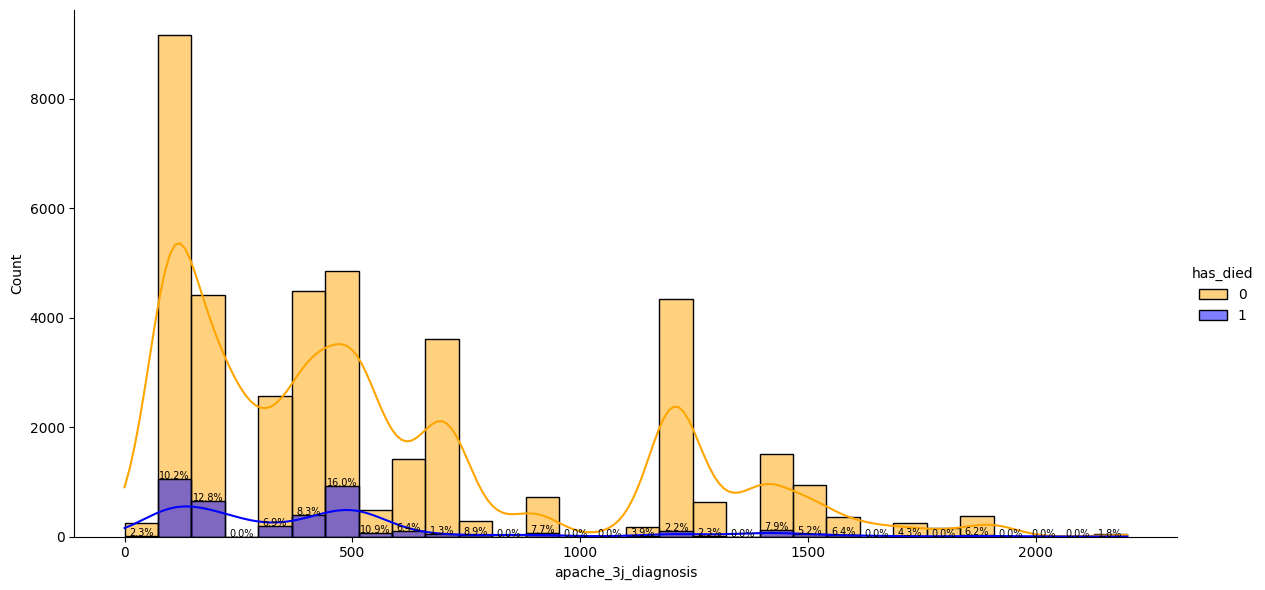

feature: d1_glucose_max


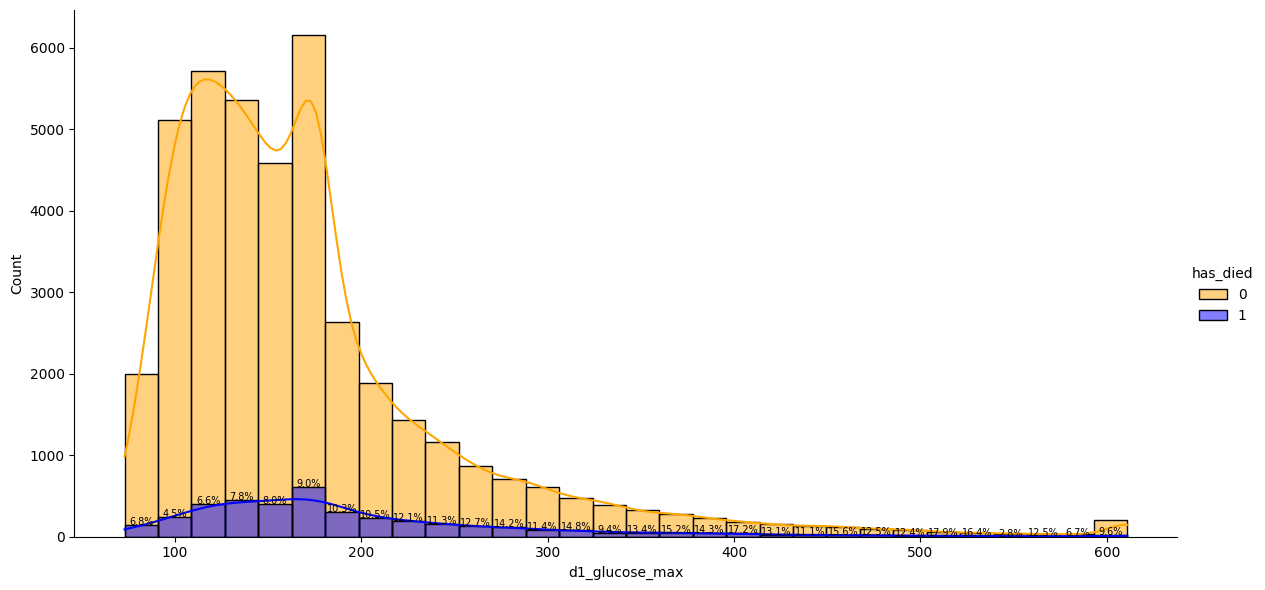

feature: apache_4a_hospital_death_prob


C:\Users\lab\AppData\Local\Temp\ipykernel_1872\3289245819.py:24: RuntimeWarning: invalid value encountered in divide
  percentages = (bin_heights / hist_data_all[0]) * 100


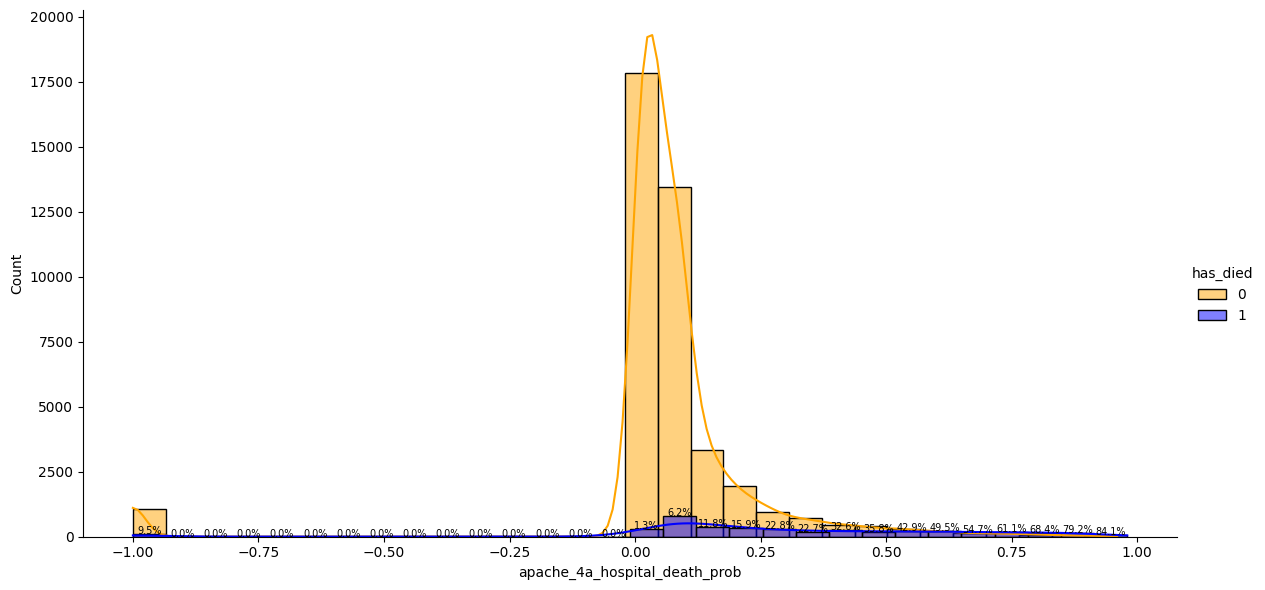

feature: heart_rate_apache


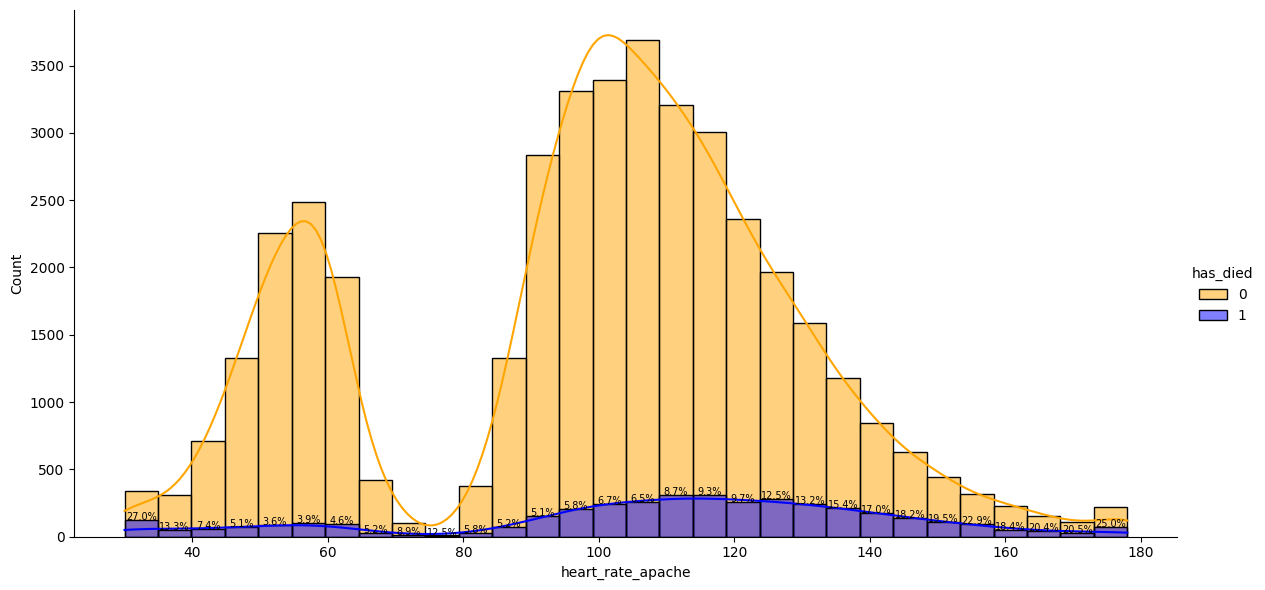

feature: h1_heartrate_min


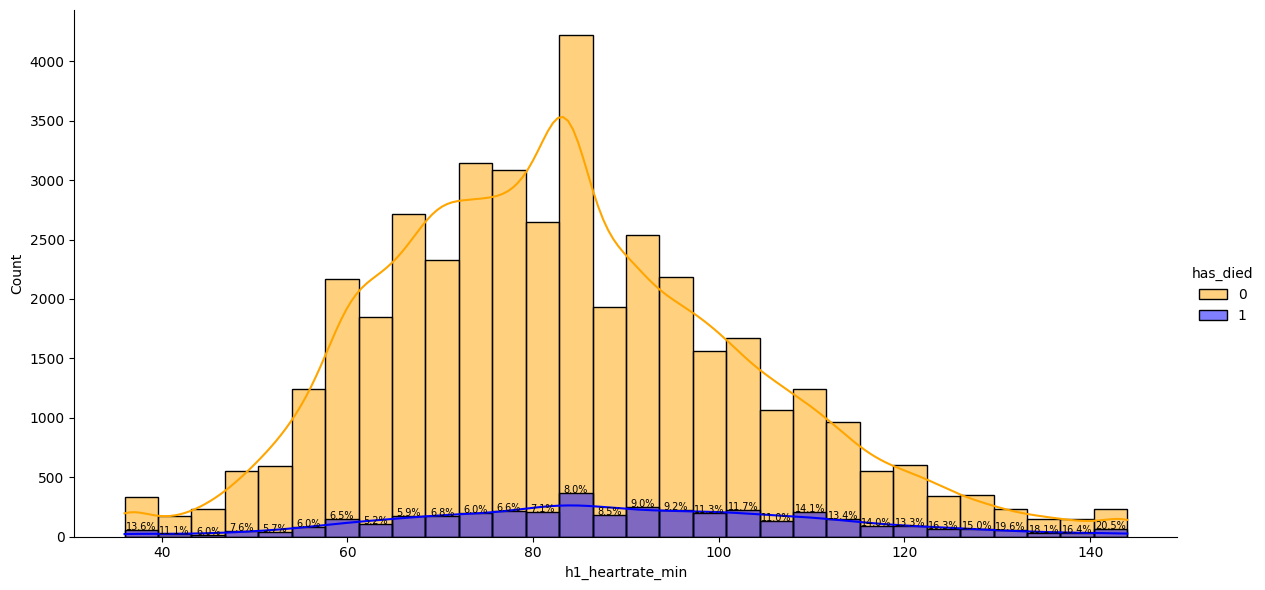

feature: weight


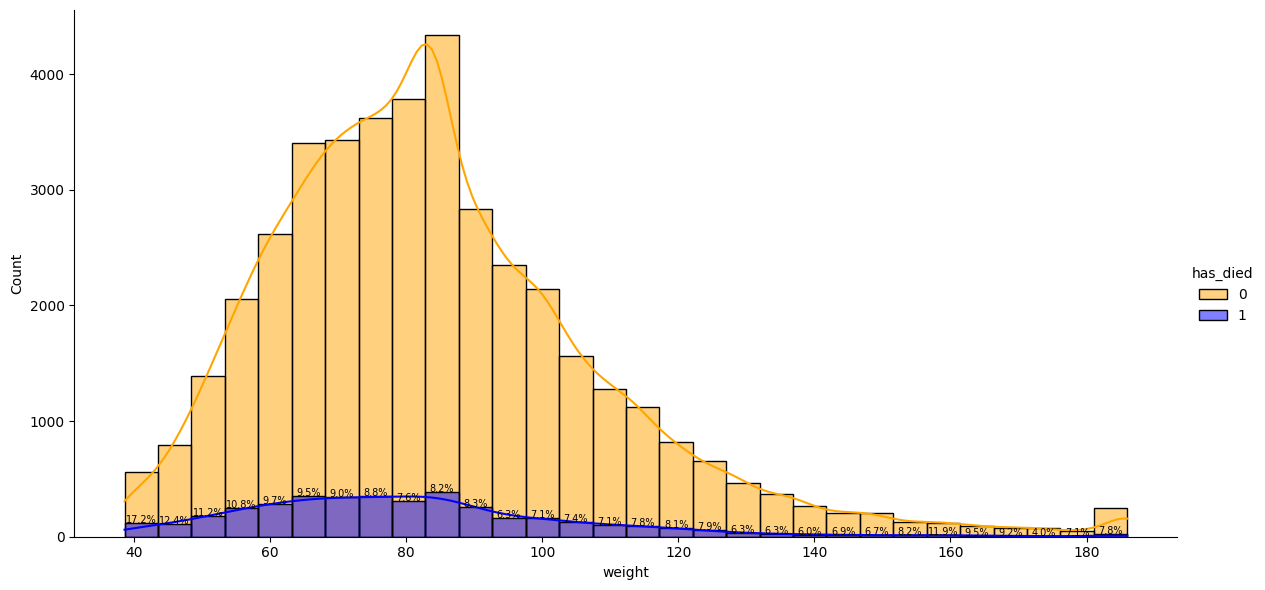

feature: h1_mbp_max


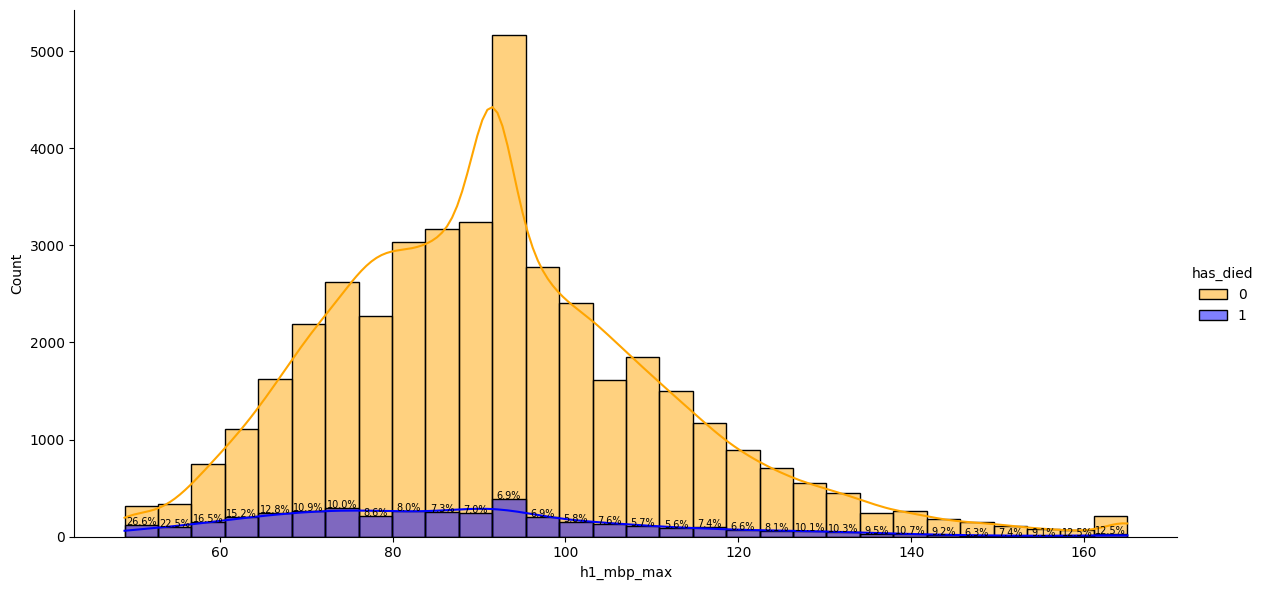

feature: resprate_apache


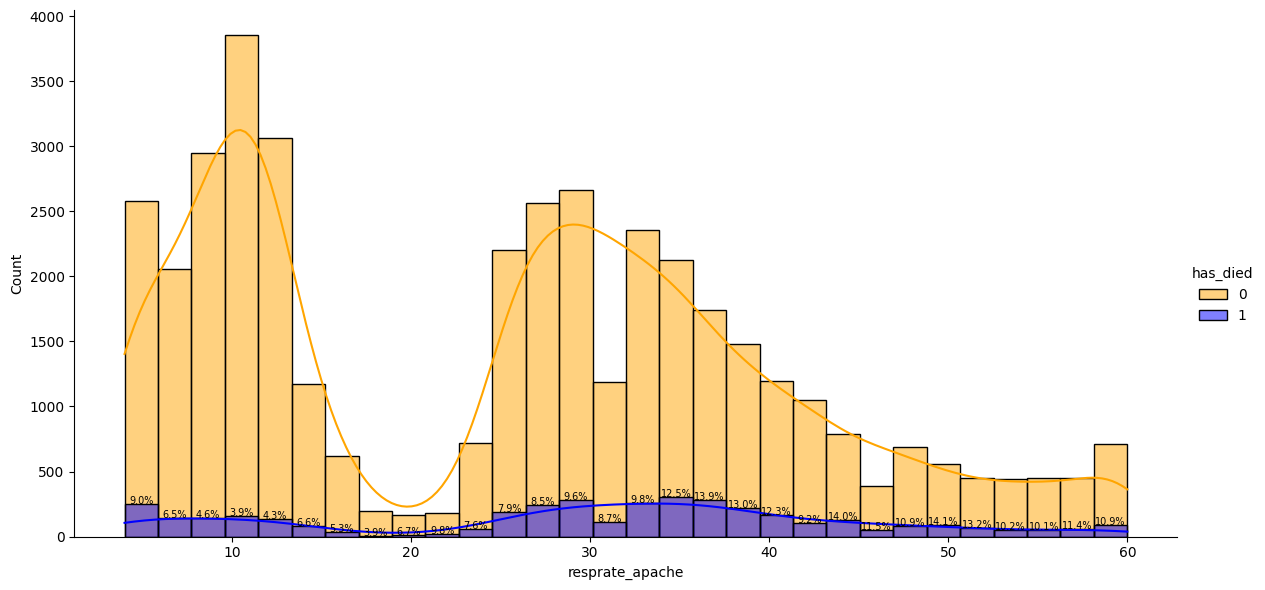

feature: apache_2_diagnosis


C:\Users\lab\AppData\Local\Temp\ipykernel_1872\3289245819.py:24: RuntimeWarning: invalid value encountered in divide
  percentages = (bin_heights / hist_data_all[0]) * 100


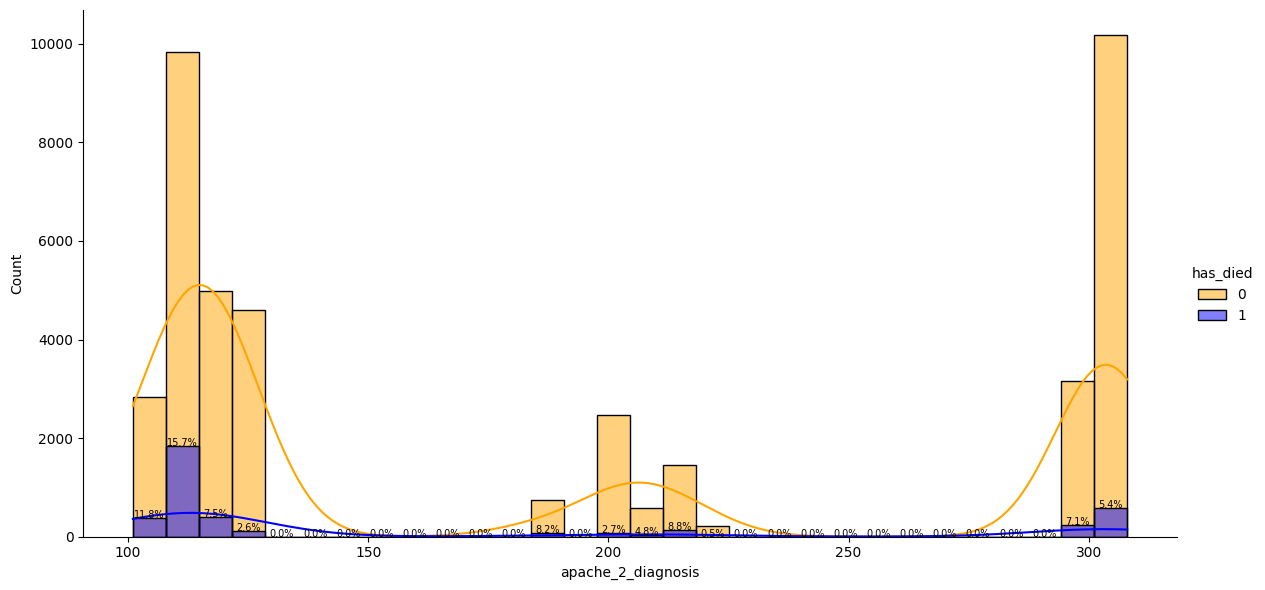

feature: d1_sysbp_noninvasive_max


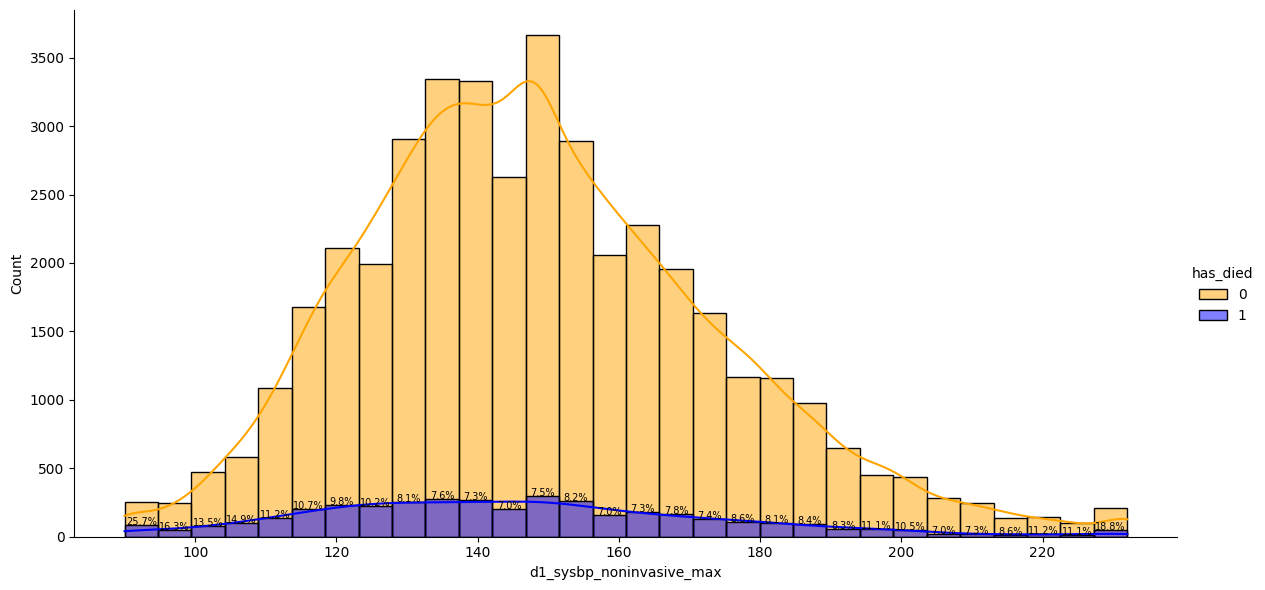

feature: d1_mbp_min


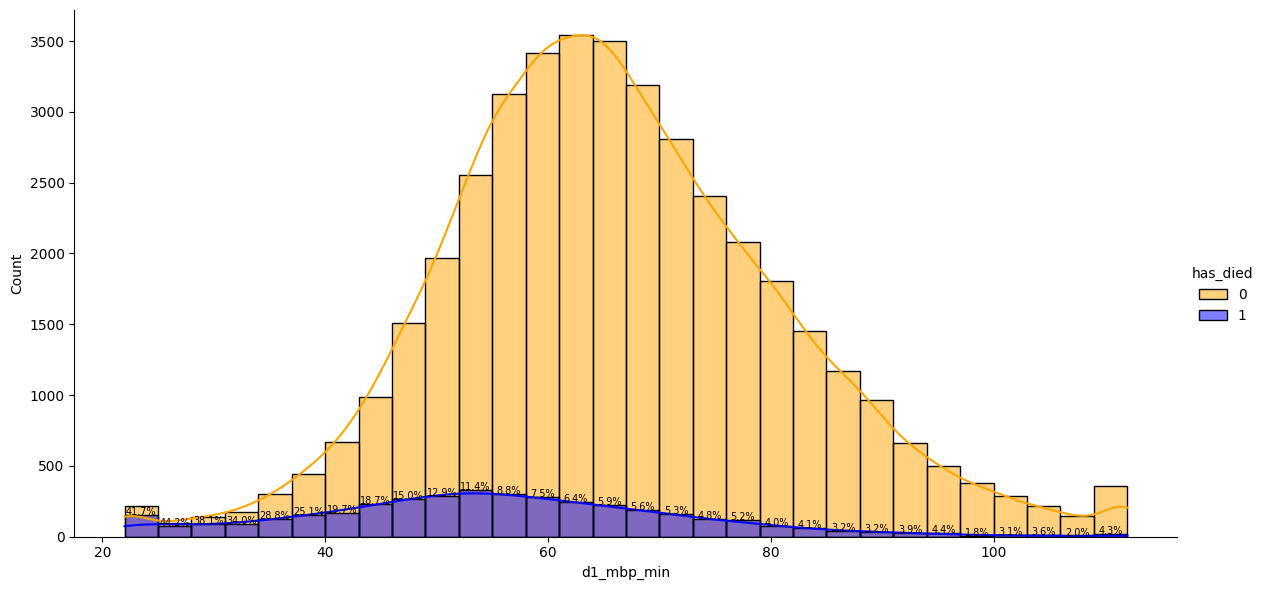

feature: h1_sysbp_noninvasive_max


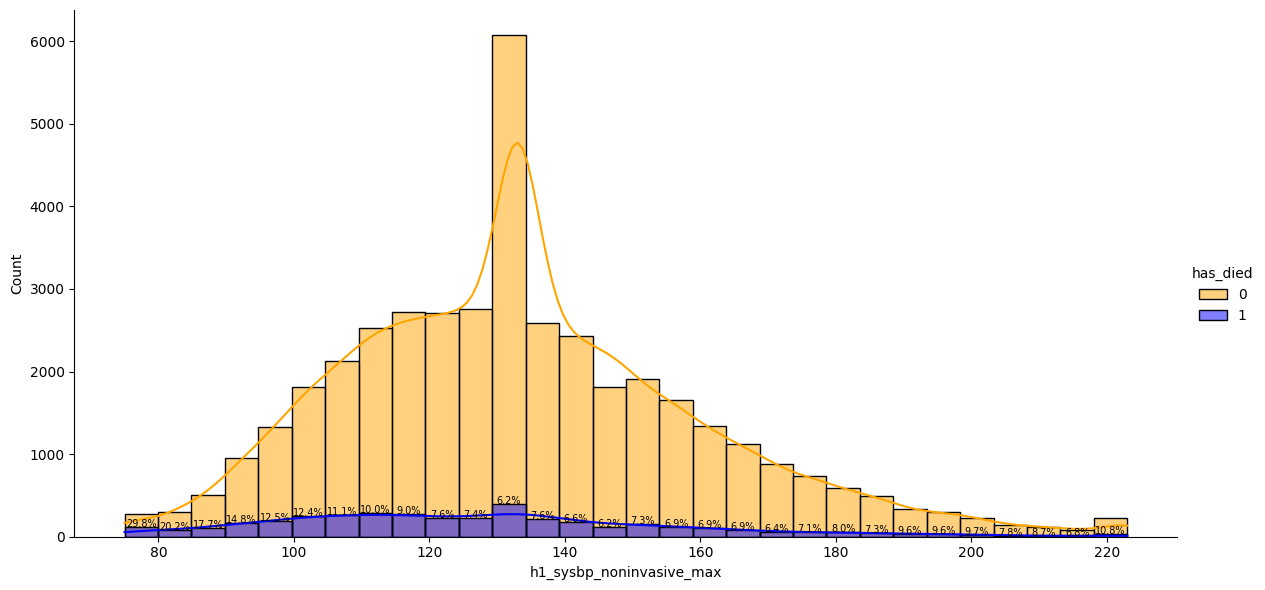

feature: h1_spo2_min


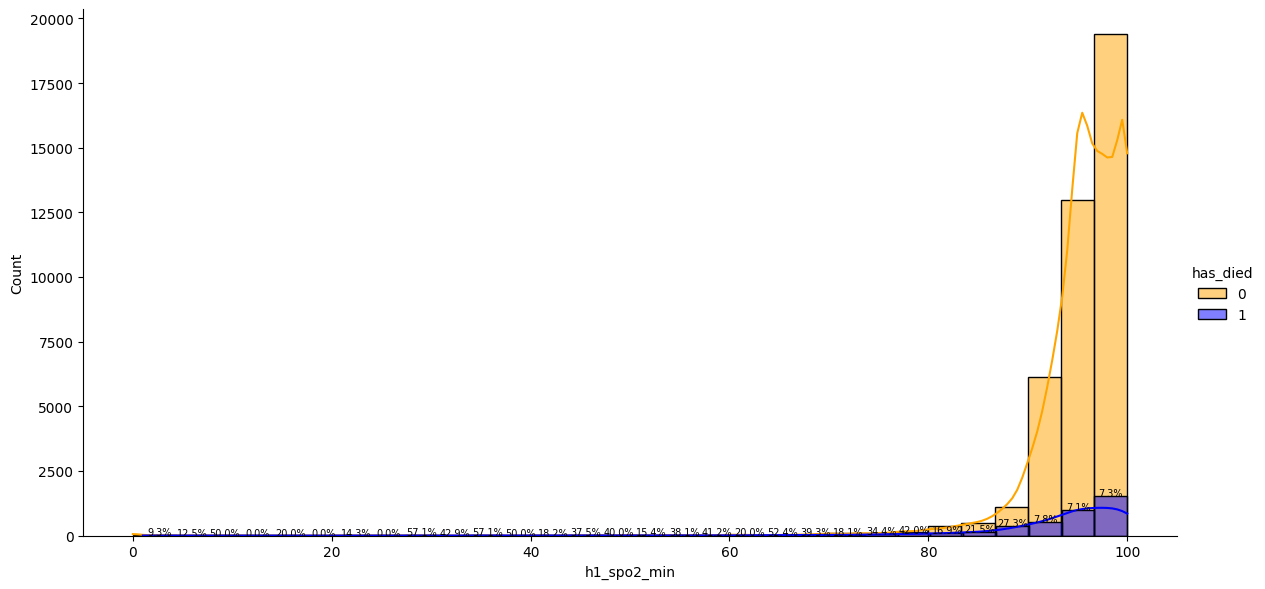

feature: d1_heartrate_min


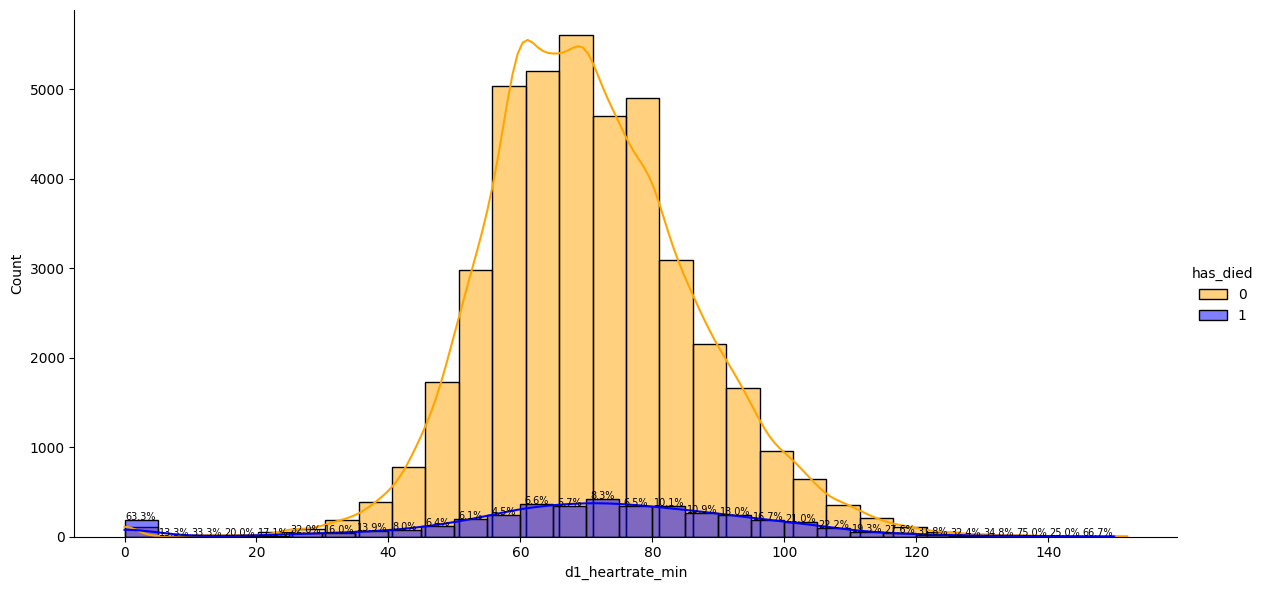

feature: h1_mbp_noninvasive_max


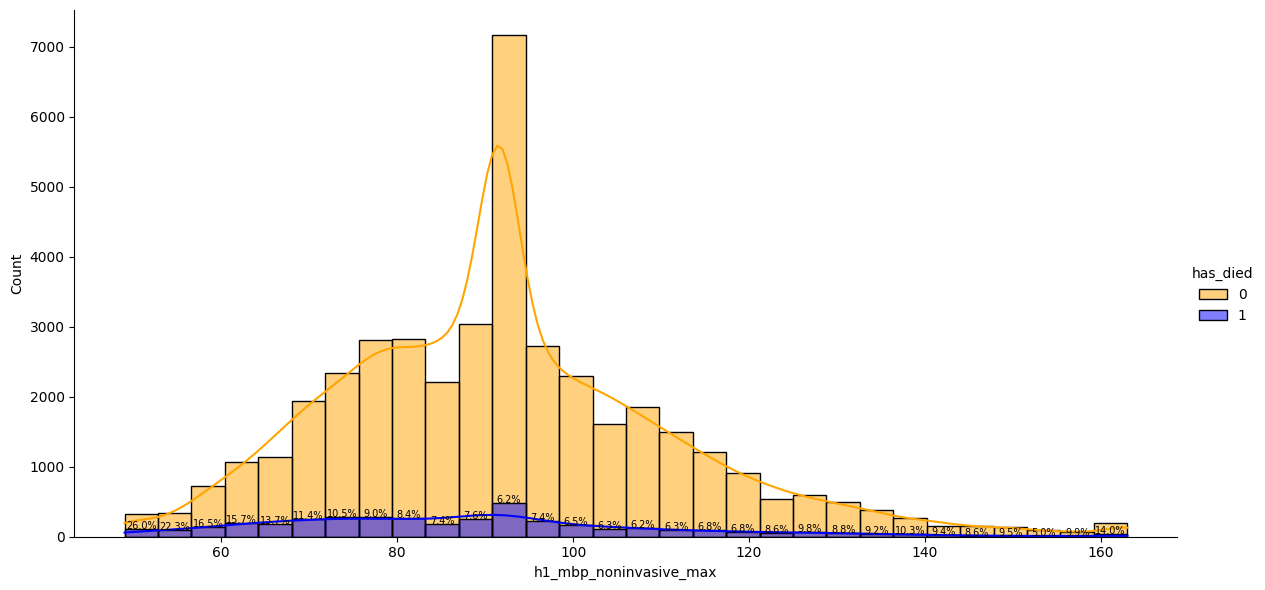

feature: bmi


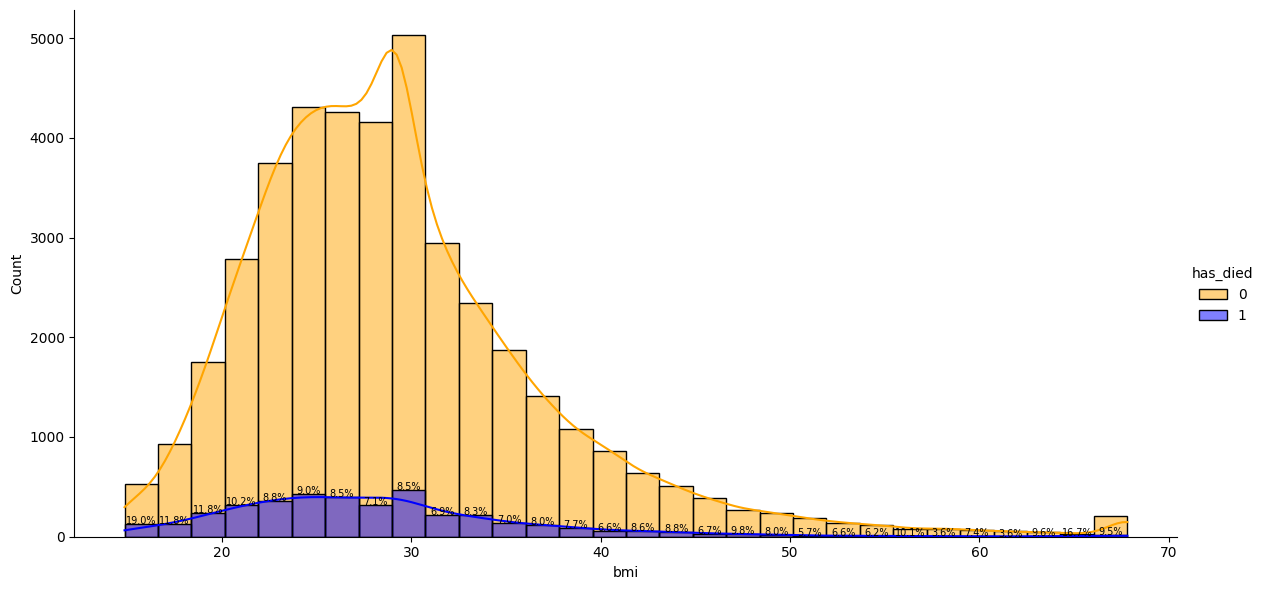

feature: gcs_verbal_apache


C:\Users\lab\AppData\Local\Temp\ipykernel_1872\3289245819.py:24: RuntimeWarning: invalid value encountered in divide
  percentages = (bin_heights / hist_data_all[0]) * 100


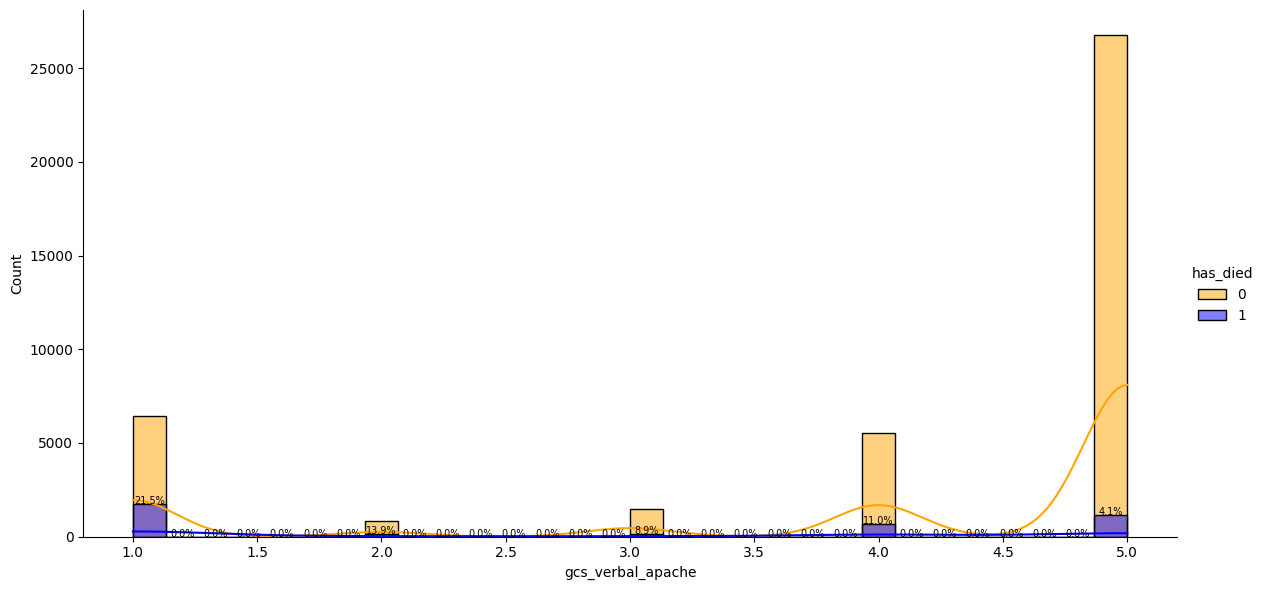

feature: d1_sysbp_max


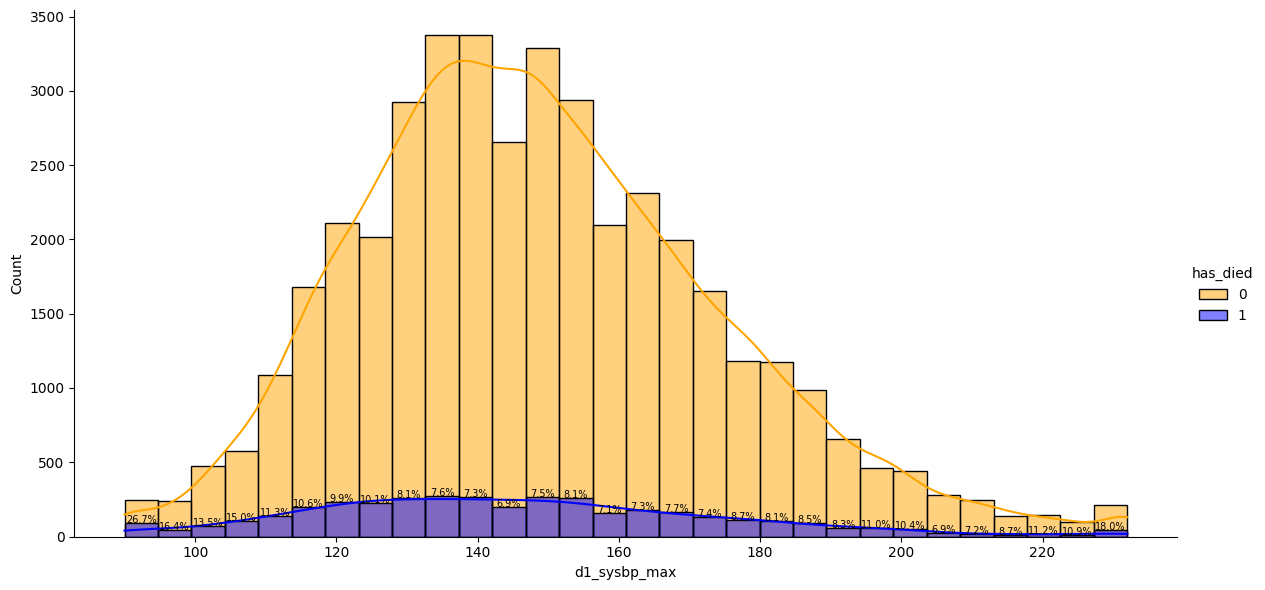

feature: h1_diasbp_noninvasive_min


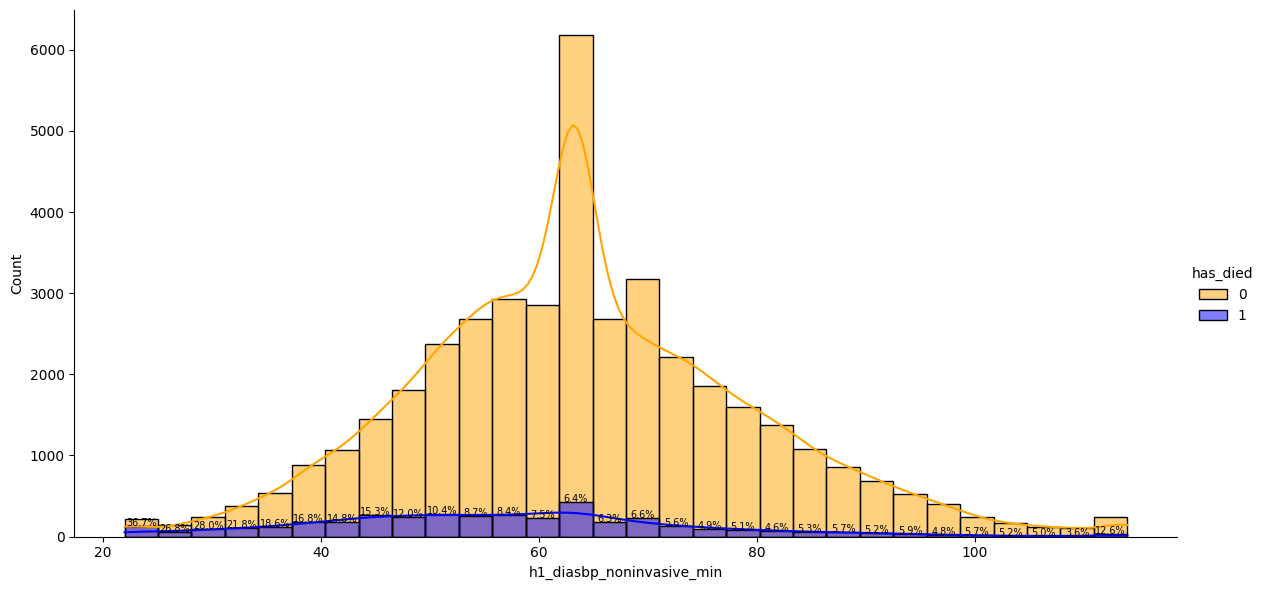

feature: age


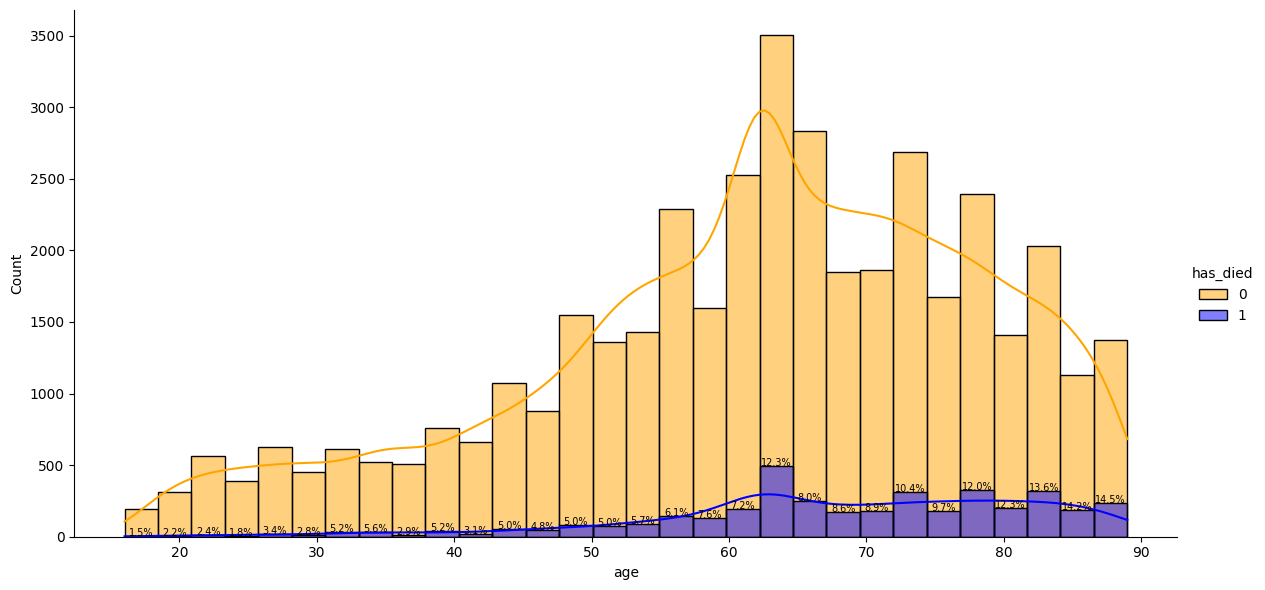

feature: gcs_eyes_apache


C:\Users\lab\AppData\Local\Temp\ipykernel_1872\3289245819.py:24: RuntimeWarning: invalid value encountered in divide
  percentages = (bin_heights / hist_data_all[0]) * 100


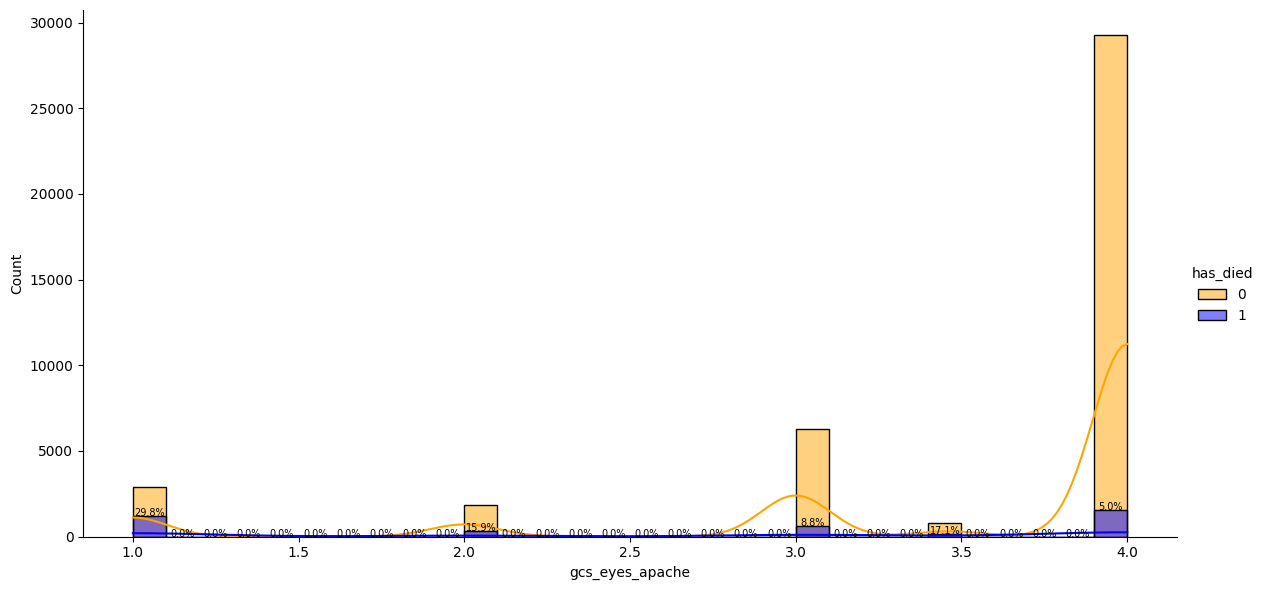

feature: d1_potassium_min


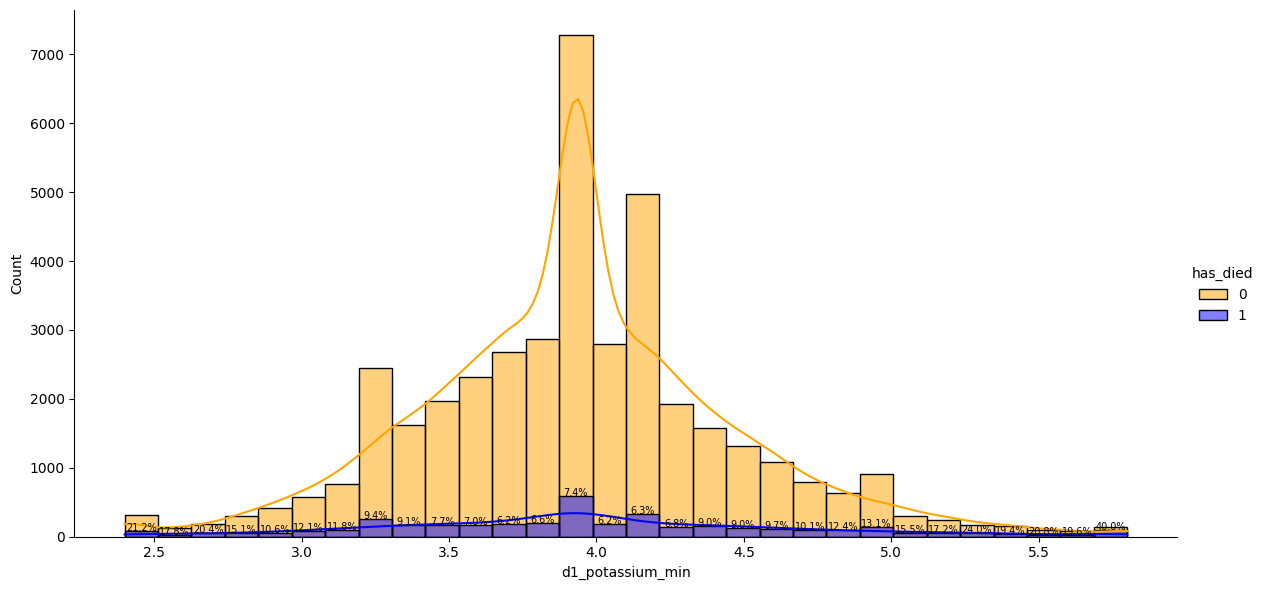

feature: d1_diasbp_max


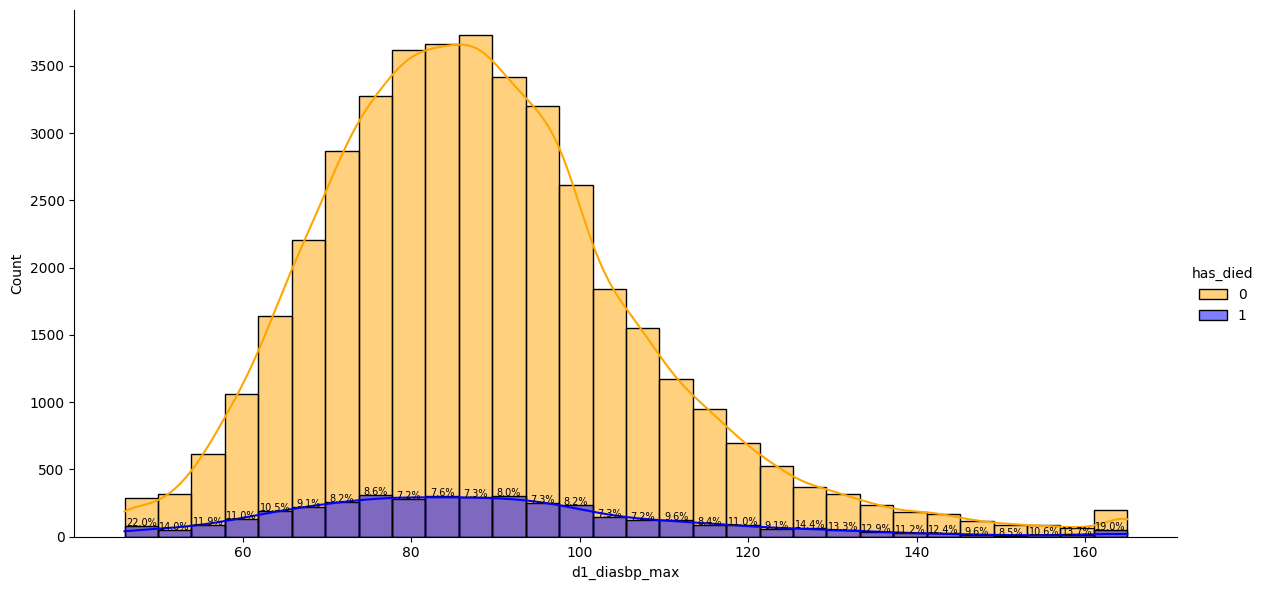

feature: d1_diasbp_min


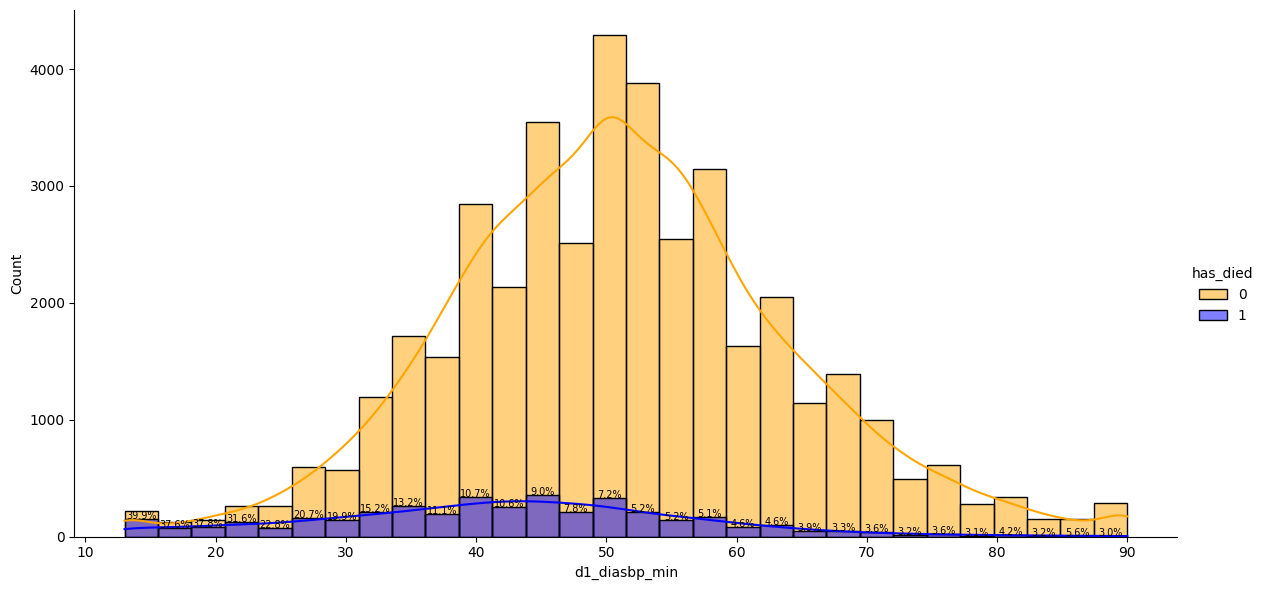

feature: d1_sysbp_min


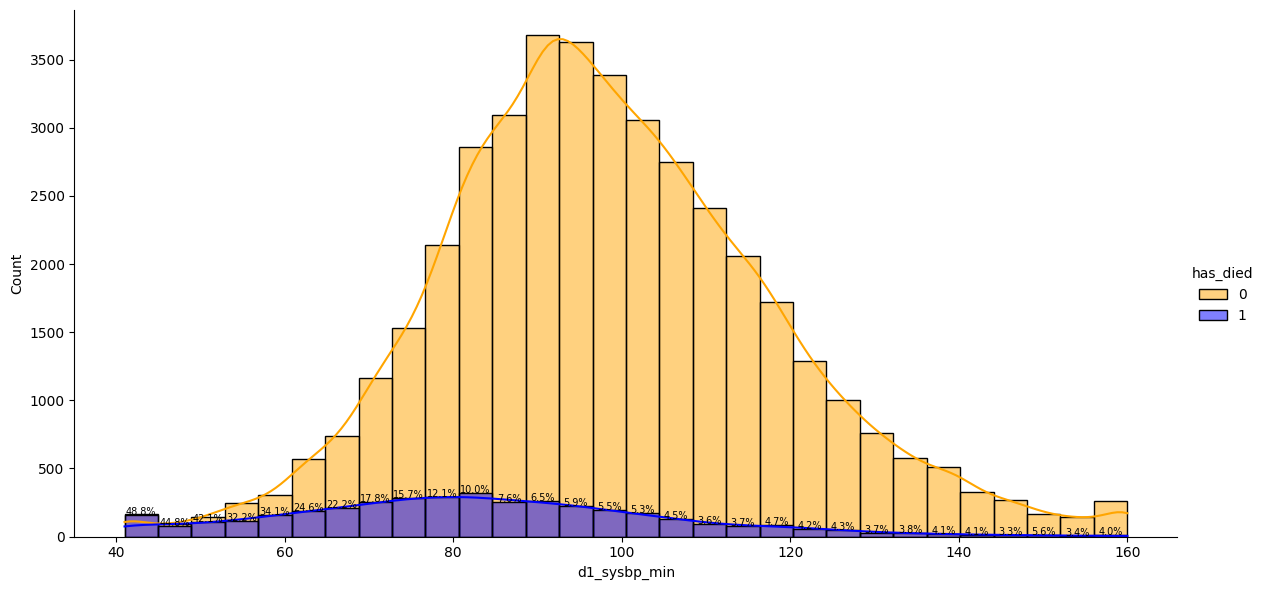

feature: d1_heartrate_max


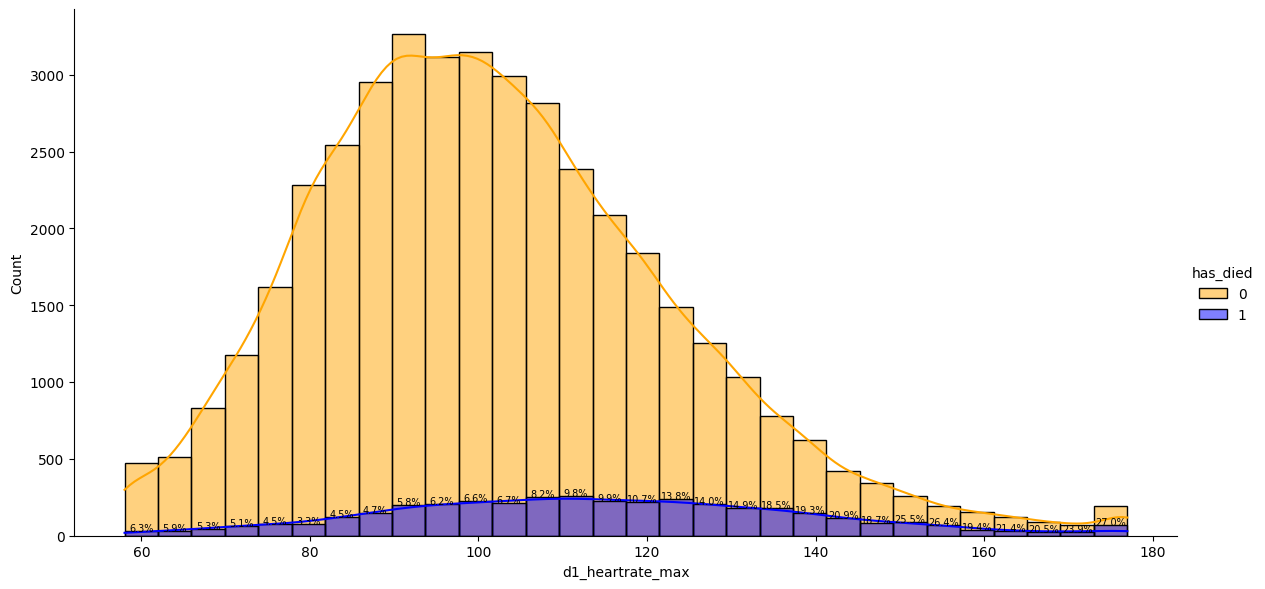

feature: h1_diasbp_max


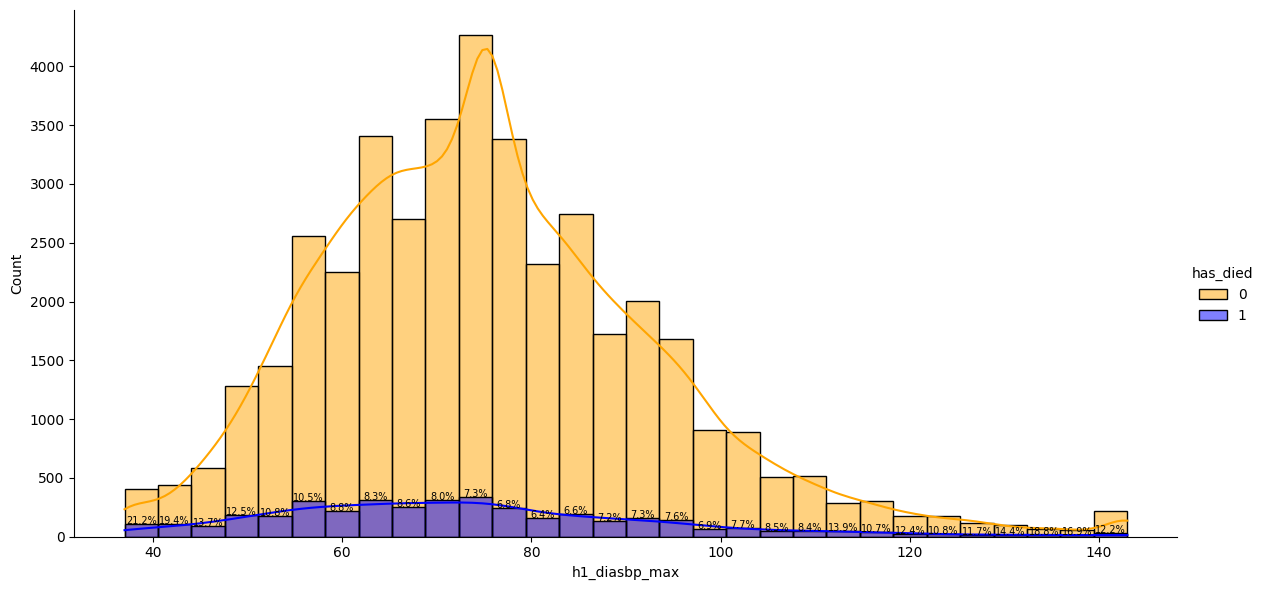

feature: d1_spo2_max


C:\Users\lab\AppData\Local\Temp\ipykernel_1872\3289245819.py:24: RuntimeWarning: divide by zero encountered in divide
  percentages = (bin_heights / hist_data_all[0]) * 100
C:\Users\lab\AppData\Local\Temp\ipykernel_1872\3289245819.py:24: RuntimeWarning: invalid value encountered in divide
  percentages = (bin_heights / hist_data_all[0]) * 100


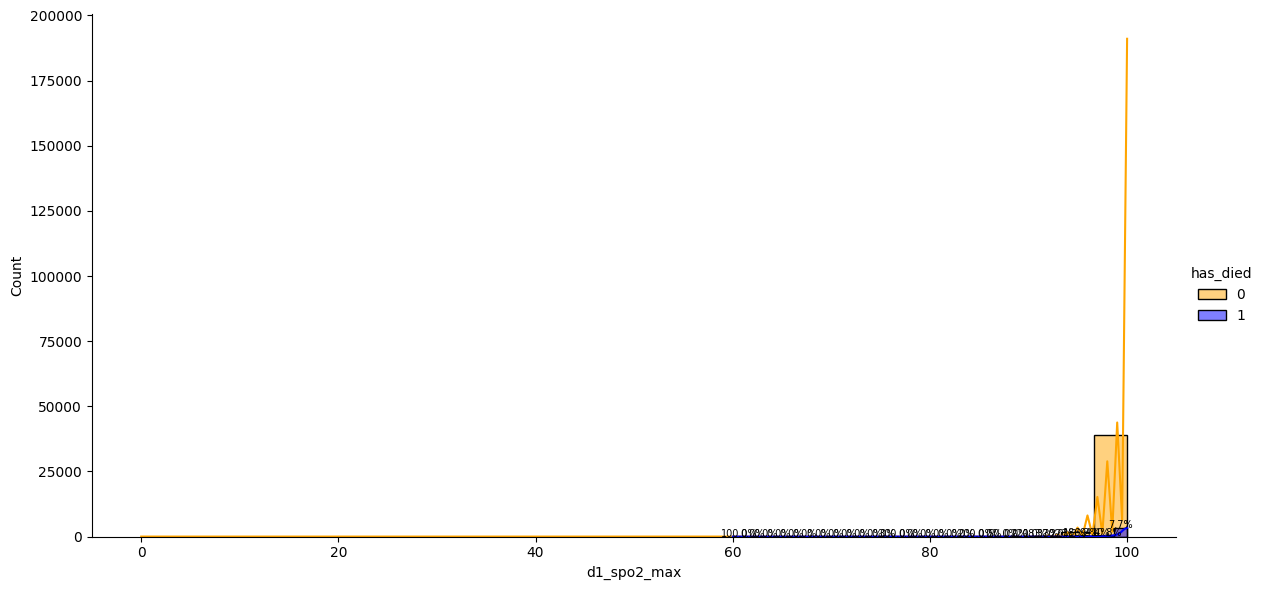

feature: d1_diasbp_noninvasive_max


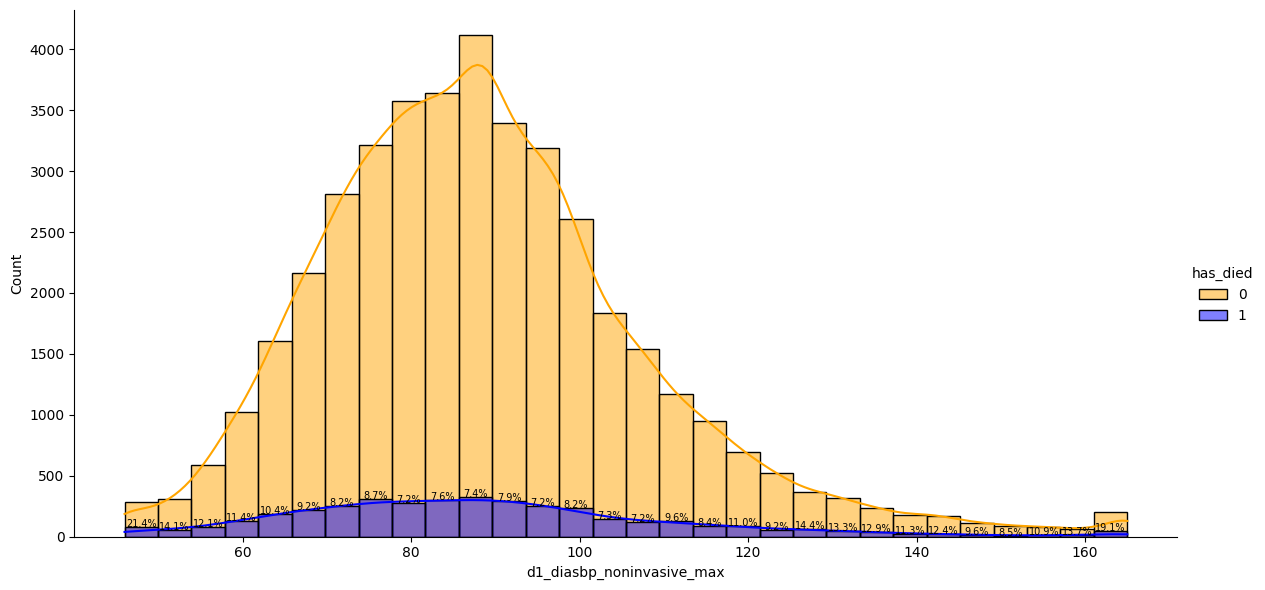

feature: d1_sysbp_noninvasive_min


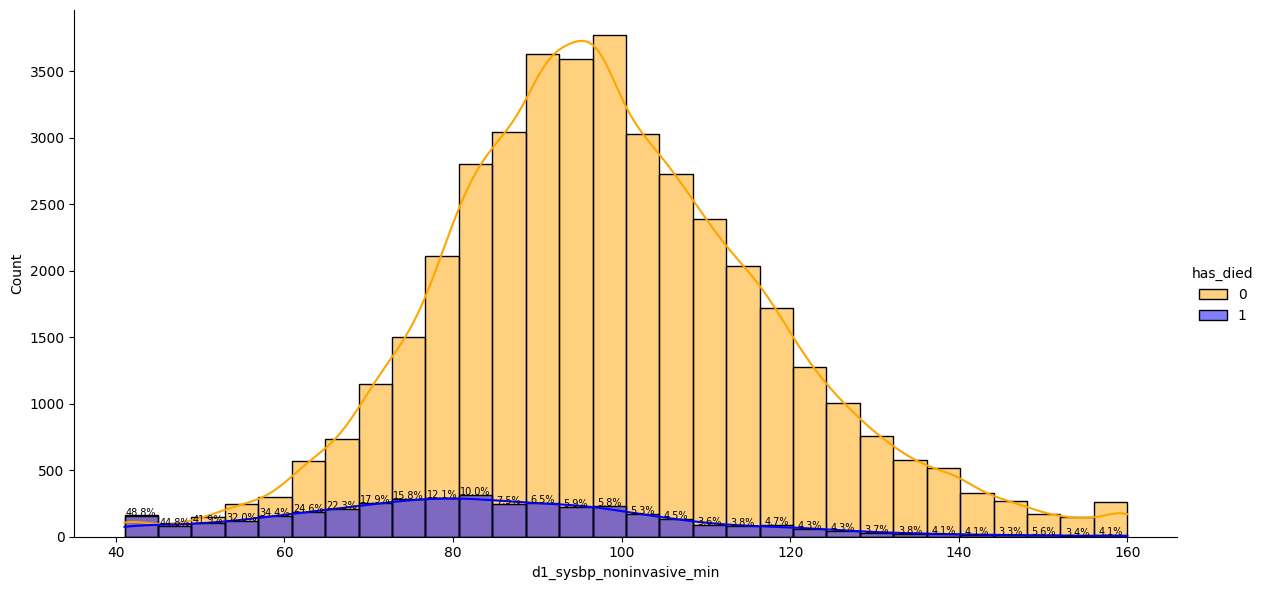

feature: pre_icu_los_days


C:\Users\lab\AppData\Local\Temp\ipykernel_1872\3289245819.py:24: RuntimeWarning: divide by zero encountered in divide
  percentages = (bin_heights / hist_data_all[0]) * 100
C:\Users\lab\AppData\Local\Temp\ipykernel_1872\3289245819.py:24: RuntimeWarning: invalid value encountered in divide
  percentages = (bin_heights / hist_data_all[0]) * 100


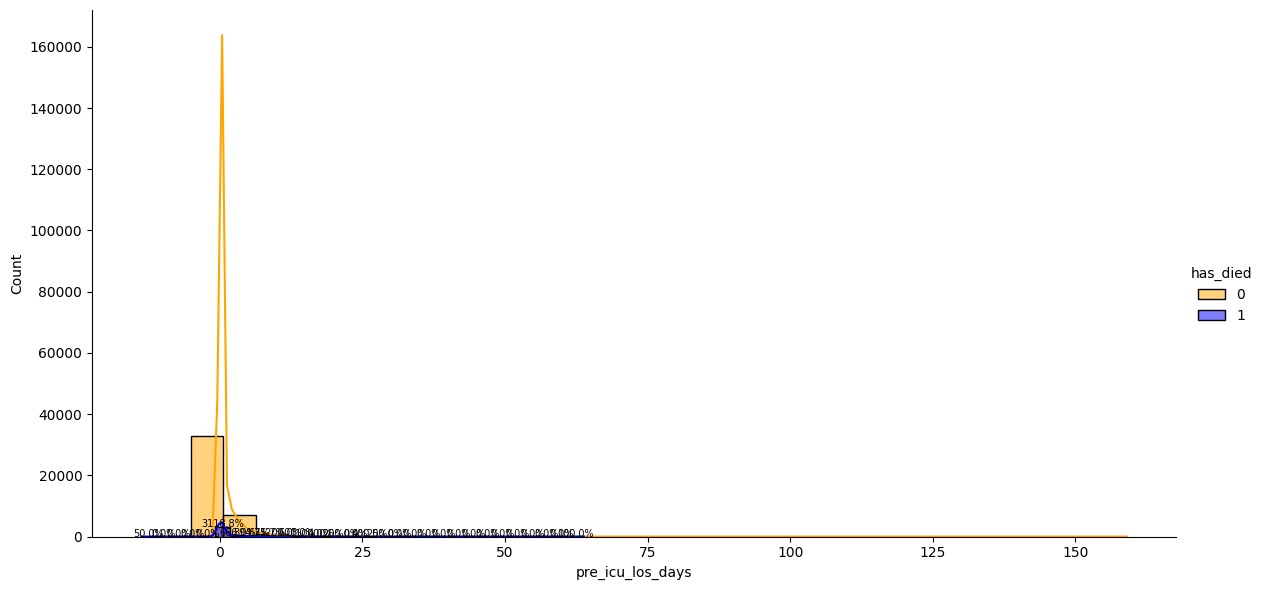

feature: d1_temp_max


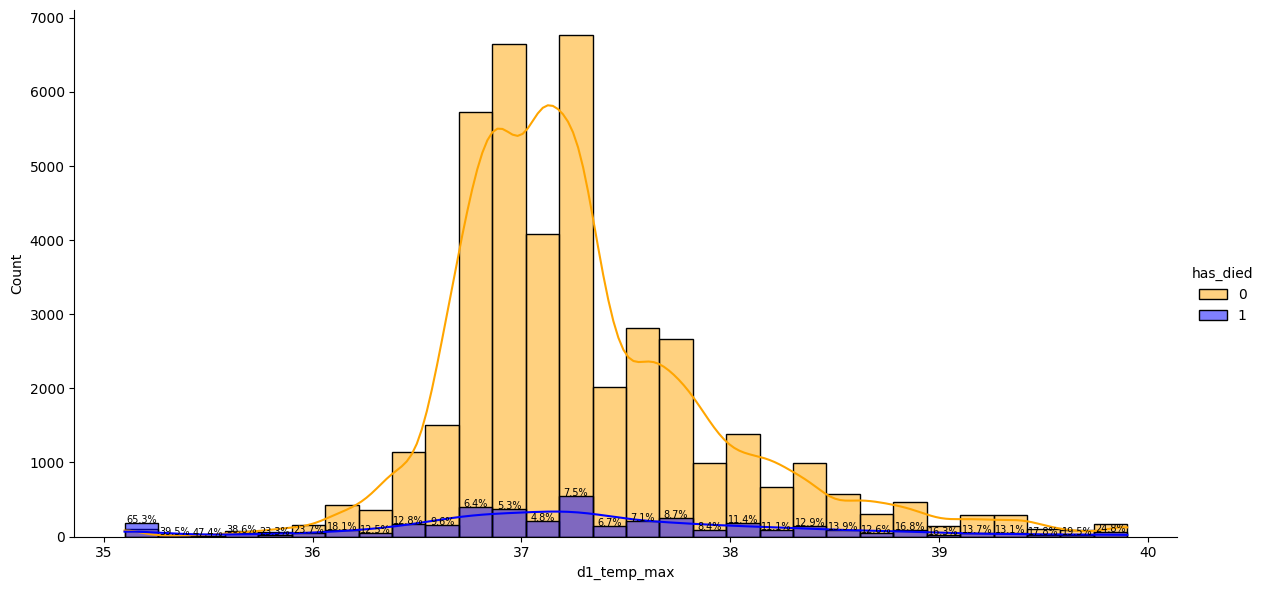

feature: d1_potassium_max


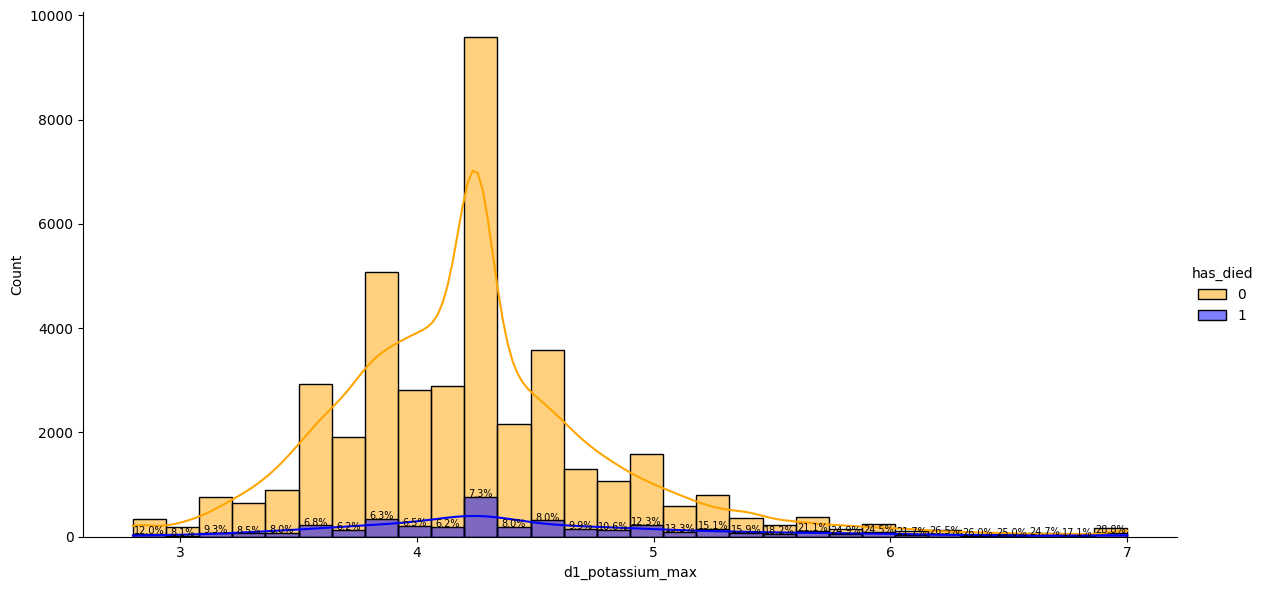

feature: h1_resprate_min


C:\Users\lab\AppData\Local\Temp\ipykernel_1872\3289245819.py:24: RuntimeWarning: divide by zero encountered in divide
  percentages = (bin_heights / hist_data_all[0]) * 100
C:\Users\lab\AppData\Local\Temp\ipykernel_1872\3289245819.py:24: RuntimeWarning: invalid value encountered in divide
  percentages = (bin_heights / hist_data_all[0]) * 100


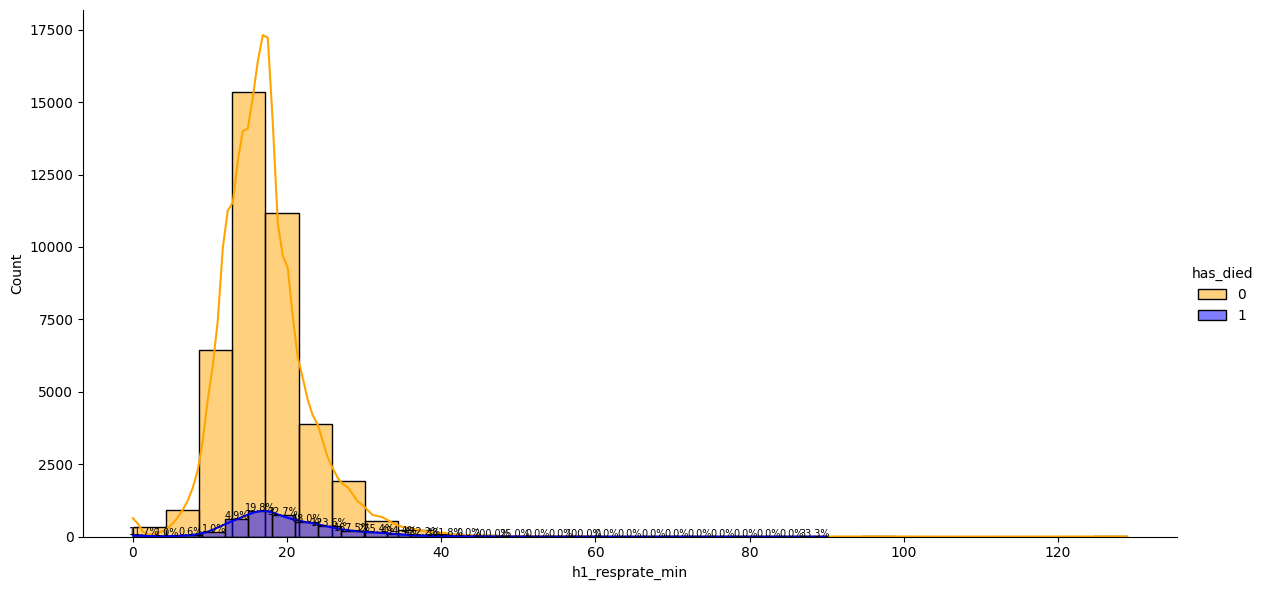

feature: height


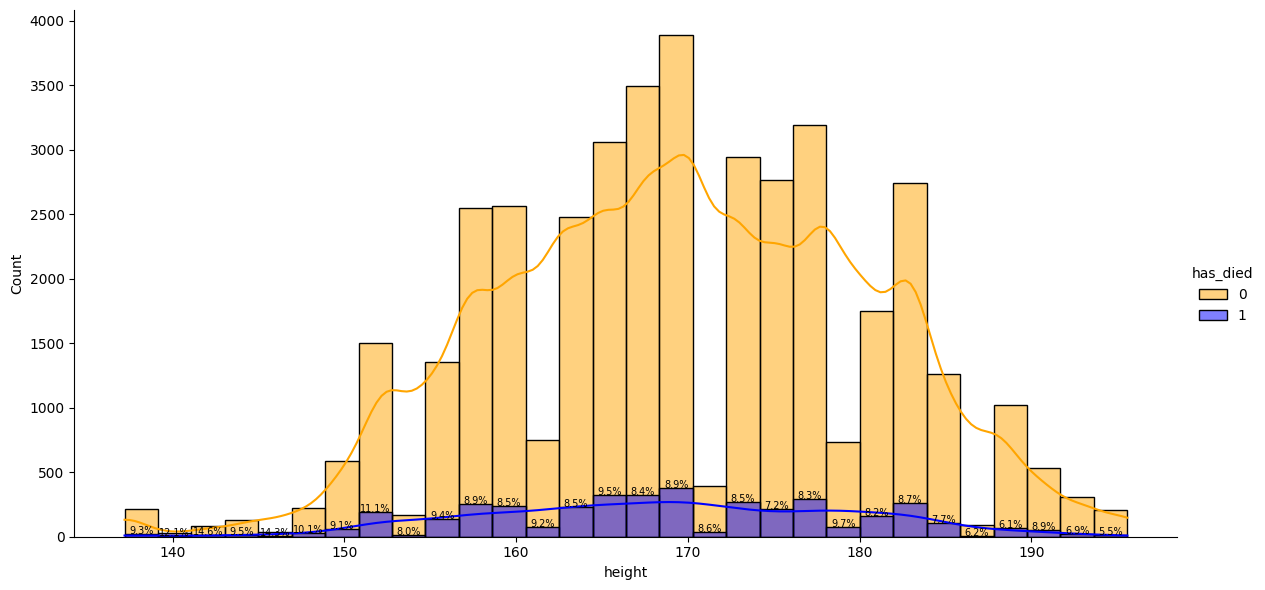

feature: temp_apache


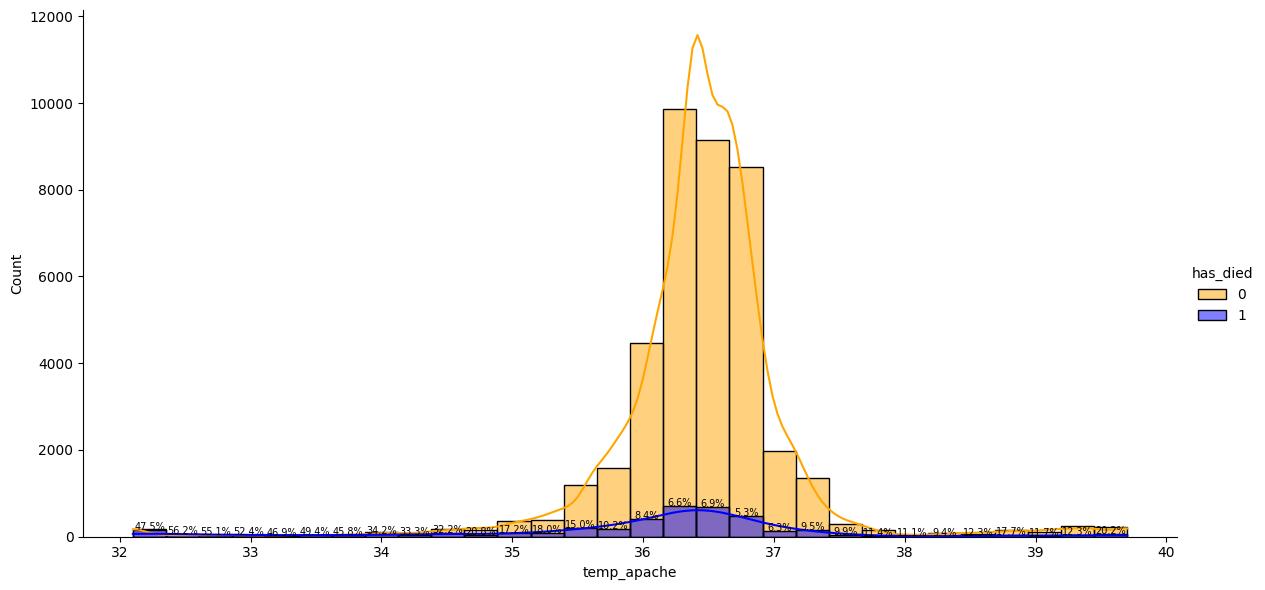

feature: d1_mbp_noninvasive_min


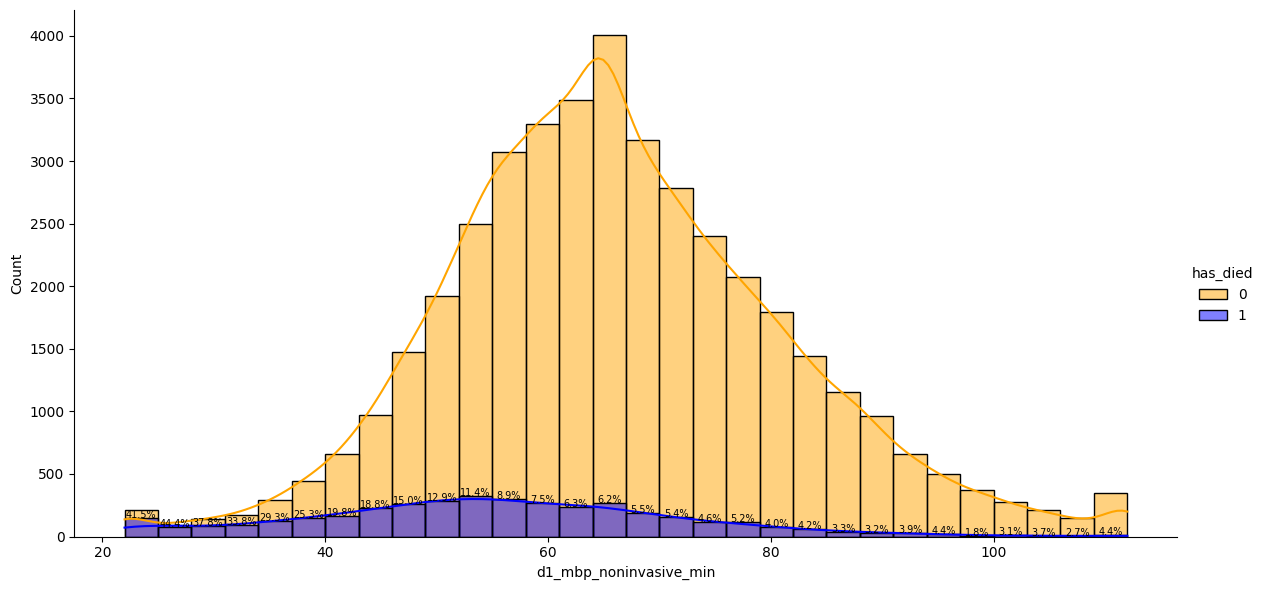

feature: d1_mbp_noninvasive_max


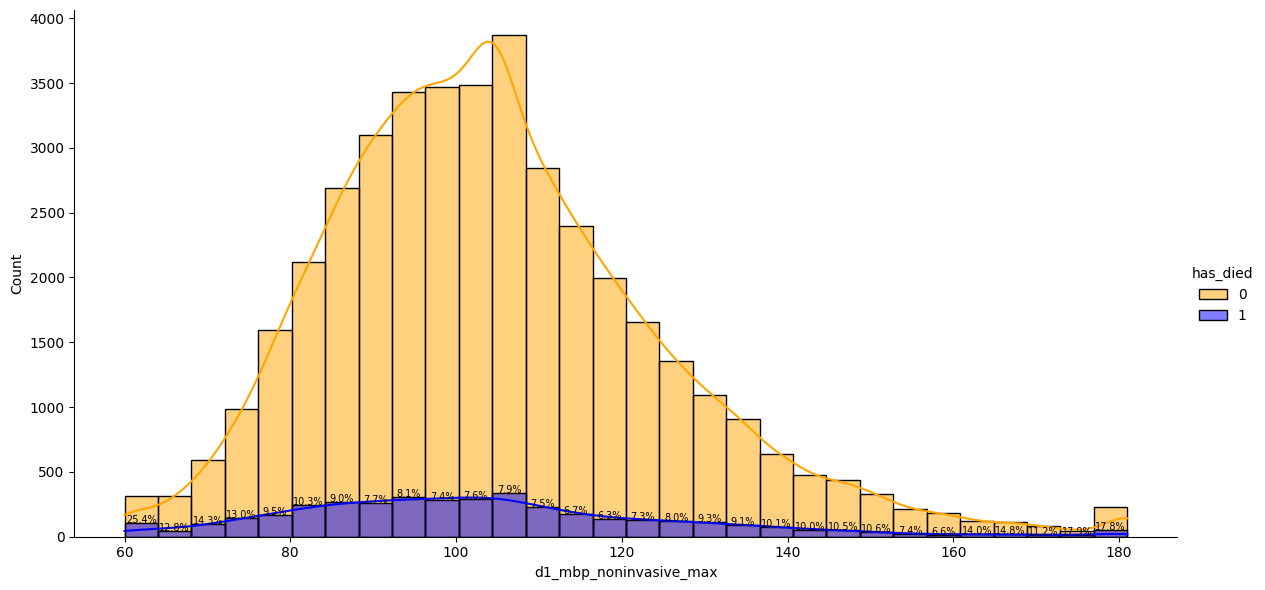

In [40]:
import seaborn as sns
# fill missing value of numerical feature with mean
numerical_feature = set(train_X.columns) - set(categorical_feature)
numerical_feature = list(numerical_feature)
fill_num_nan = train_X[numerical_feature].fillna(train_X[numerical_feature].mean())
# continuous distribution and stacked histogram of numerical feature in one figure
# orange for label 1, blue for label 0
merged_num_train = fill_num_nan.copy()
merged_num_train['has_died'] = train_Y['has_died']

# Define a color dictionary
color_dict = {0: 'orange', 1: 'blue'}

for feature in numerical_feature:
    print("feature: {}".format(feature))
    g = sns.FacetGrid(merged_num_train, hue="has_died", palette=color_dict, height=6, aspect=2)
    g.map(sns.histplot, feature, kde=True, bins=30, stat="count")
    
    # Calculate the percentage of label=1 for each bin
    hist_data = np.histogram(merged_num_train[merged_num_train['has_died'] == 1][feature], bins=30)
    hist_data_all = np.histogram(merged_num_train[feature], bins=30)
    bin_edges = hist_data[1]
    bin_heights = hist_data[0]
    percentages = (bin_heights / hist_data_all[0]) * 100
    percentages[hist_data_all[0] == 0] = 0
    
    # Add the percentages to the plot
    for i in range(len(bin_edges) - 1):
        bin_center = (bin_edges[i] + bin_edges[i+1]) / 2
        plt.text(bin_center, bin_heights[i], f"{percentages[i]:.1f}%", ha='center', fontsize=7)
    
    g.add_legend()
    plt.show()

In [ ]:
# replace gender with 0 and 1
train_X['gender'].replace('M', 0, inplace=True)
train_X['gender'].replace('F', 1, inplace=True)

In [ ]:
# one hot encoding
train_X = pd.get_dummies(train_X, columns=categorical_feature)
# remove columns name with nan
for column in train_X.columns:
    if 'nan' in column:
        train_X.drop([column], axis=1, inplace=True)

<Axes: >

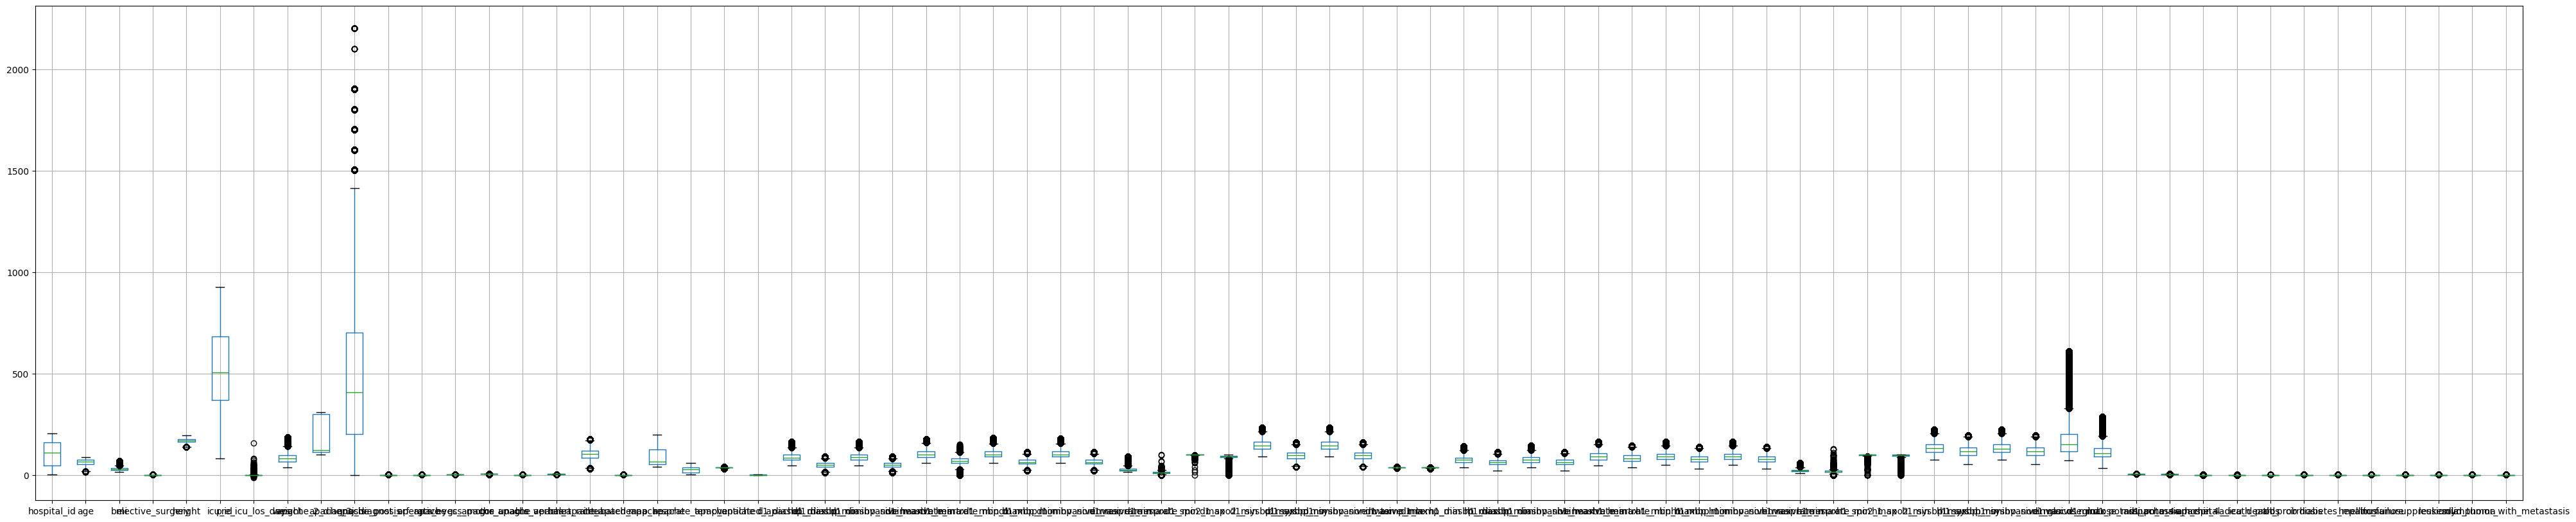

In [47]:
# outlier detection for all numerical columns in one figure
train_X.boxplot(figsize=(50, 10))

In [48]:
# remove the outlier detetcted by IQR rule and show how many data are removed
for feature in train_X.columns:
    if train_X[feature].dtype != 'object':
        Q1 = train_X[feature].quantile(0.25)
        Q3 = train_X[feature].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        outlier = train_X[(train_X[feature] < lower) | (train_X[feature] > upper)].index
        train_X.drop(outlier, inplace=True)
        print("feature {}, {} data are removed".format(feature, len(outlier)))

feature hospital_id, 0 data are removed
feature age, 70 data are removed
feature bmi, 1602 data are removed
feature elective_surgery, 7956 data are removed
feature height, 114 data are removed
feature icu_id, 0 data are removed
feature pre_icu_los_days, 5879 data are removed
feature weight, 356 data are removed
feature apache_2_diagnosis, 0 data are removed
feature apache_3j_diagnosis, 828 data are removed
feature apache_post_operative, 0 data are removed
feature arf_apache, 800 data are removed
feature gcs_eyes_apache, 2591 data are removed
feature gcs_motor_apache, 3217 data are removed
feature gcs_unable_apache, 239 data are removed
feature gcs_verbal_apache, 4119 data are removed
feature heart_rate_apache, 0 data are removed
feature intubated_apache, 376 data are removed
feature map_apache, 0 data are removed
feature resprate_apache, 0 data are removed
feature temp_apache, 1026 data are removed
feature ventilated_apache, 1377 data are removed
feature d1_diasbp_max, 350 data are rem

<Axes: >

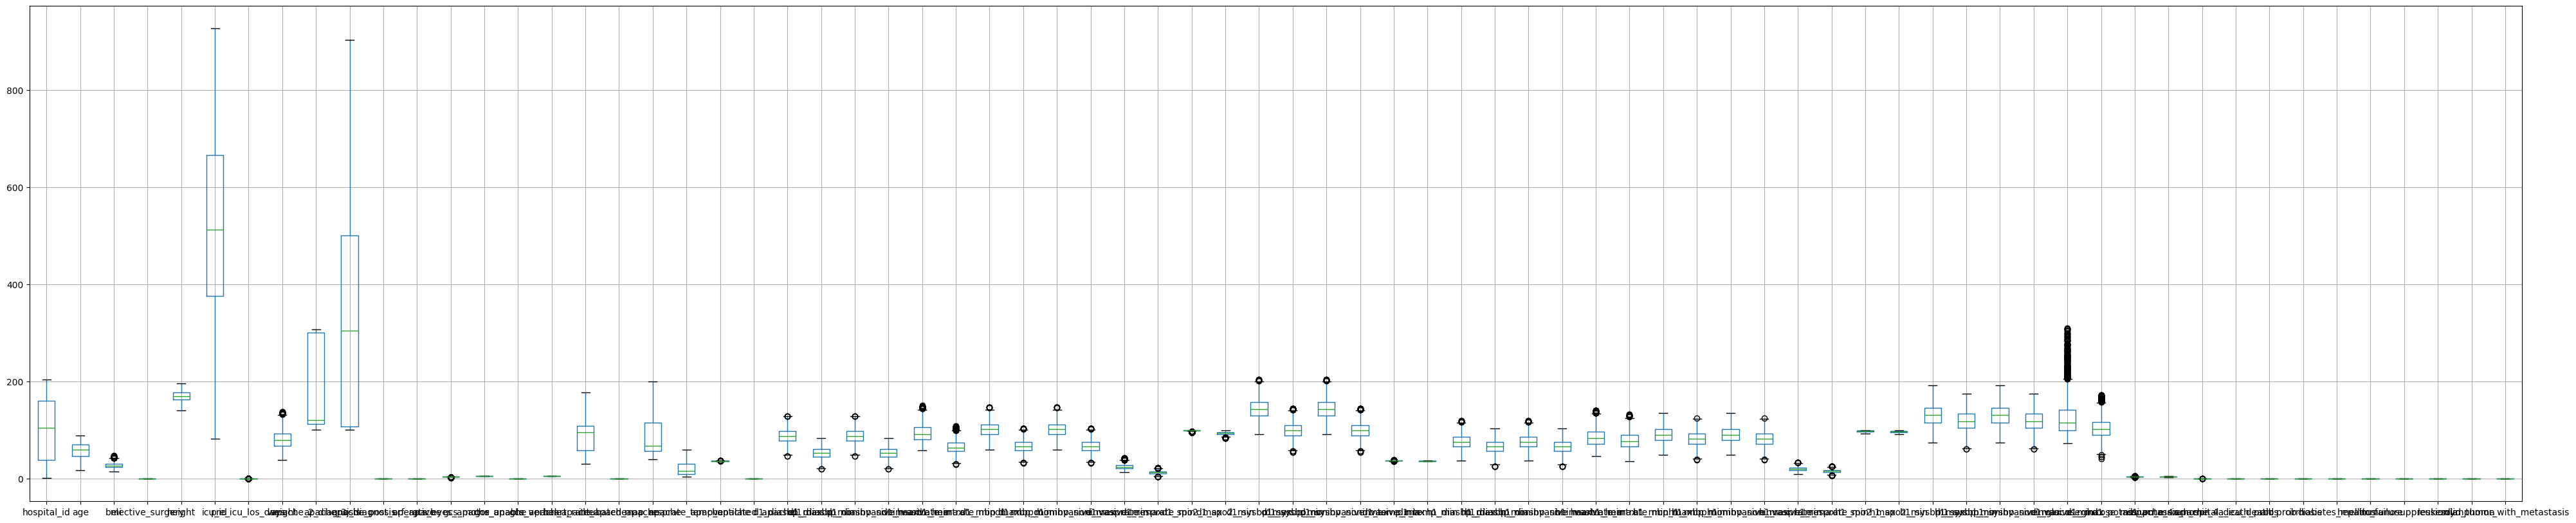

In [39]:
train_X.boxplot(figsize=(50, 10))